In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels
import statsmodels.api

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '')

In [4]:
country_pop_dict = {'Antigua and Barbuda':96286,'Bahamas':393244,'Bahrain':1701575,'Barbados':287375,
                    'Bolivia (Plurinational State of)':11673021,'Brunei Darussalam':437479,'Congo':89561403,'Cook Islands':17564,
                   'Cuba':11326616,'Czechia':10708981,"Côte d'Ivoire":26286219,"Democratic People's Republic of Korea":25778816,
                    'Democratic Republic of the Congo':89561403,'Dominica':71986,'Egypt':102334404,'Gambia':2416668,'Grenada':112523,
                    'Iran (Islamic Republic of)':83992949,'Kuwait':4270571,'Kyrgyzstan':6524195,"Lao People's Democratic Republic":7275560,
                    'Libya':6871292,'Marshall Islands':59190,"Micronesia (Federated States of)":548914,"Monaco":39203,'Nauru':10824,
                    'New Zealand':4822233,'Niue':1626,"Oman":5106626,'Qatar':2881053,'Republic of Korea':51269185,
                    'Republic of Moldova':4033963,'Saint Kitts and Nevis':53199,'Saint Lucia':183627,'Saint Vincent and the Grenadines':110940,
                    'San Marino':33921,'Saudi Arabia':34813871,'Singapore':5850342,'Slovakia':5459642,'Somalia':15830339,
                    'The former Yugoslav republic of Macedonia':2083374,'United Arab Emirates':9890000,
                    "United Kingdom of Great Britain and Northern Ireland":67886011,'United Republic of Tanzania':59734218, 'Eritrea':3546421,
                    'United States of America':331002651,"Venezuela (Bolivarian Republic of)":28435940,'Viet Nam':97338579,'Yemen':29825964
                   }

In [5]:
df2 = df[df.Country.isin(list(country_pop_dict.keys()))]

In [6]:
df2['Population']=df.Country

In [7]:
df2.Population=df2.Population.map(lambda x: country_pop_dict[x])

In [8]:
df2.Population=df2.Population.astype(float)

In [9]:
df=df[df.Country.isin(country_pop_dict.keys())!=True]

In [10]:
ab=pd.concat([df,df2])

In [11]:
df=ab

In [12]:
df.sort_values(by='Country',inplace=True)

In [13]:
df['Lifeexpectancy'].fillna(71,inplace=True)

In [14]:
df['AdultMortality'].fillna(154,inplace=True)

In [15]:
df['Alcohol'].fillna(4.2,inplace=True)

In [16]:
df['HepatitisB'].fillna(86,inplace=True)

In [17]:
df['BMI'].fillna(41,inplace=True)

In [18]:
df['Polio'].fillna(88,inplace=True)

In [19]:
df['Totalexpenditure'].fillna(5.8,inplace=True)

In [20]:
df['Diphtheria'].fillna(88,inplace=True)

In [21]:
df['GDP'].fillna(1766/2+7484/2,inplace=True)

In [22]:
df['thinness1-19years'].fillna(4,inplace=True)

In [23]:
df['thinness5-9years'].fillna(4,inplace=True)

In [24]:
df['Incomecompositionofresources'].fillna(0.65,inplace=True)

In [25]:
df['Schooling'].fillna(12,inplace=True)

In [26]:
country_df = df.groupby('Country',as_index=False).mean()

In [27]:
status_dict={'Developing':0,'Developed':1}
df.Status=df.Status.map(lambda x: status_dict[x])

In [28]:
df.set_index('Country',inplace=True)

In [29]:
# df['Lifeexpectancy']=pd.cut(df['Lifeexpectancy'],bins = 3).astype(str)

In [30]:
# life_dict={'(45.557, 60.067]':0,'(60.067, 74.533]':1,'(74.533, 89.0]':2}

In [31]:
# df.Lifeexpectancy=df.Lifeexpectancy.map(lambda x: life_dict[x])

In [32]:
#from sklearn.utils import resample

#training  = pd.concat([X_train, y_train], axis=1)
#class_0 = training[training.Target==0]
#class_1 = training[training.Target==1]
#class_2 = training[training.Target==2]
#class_0_upsampled = resample(class_0,
#                          replace=True, # sample with replacement
#                          n_samples=len(class_1), # match number in majority class
#                          random_state=14) # reproducible results
#class_2_upsampled = resample(class_2,
#                          replace=True, # sample with replacement
#                          n_samples=len(class_1), # match number in majority class
#                          random_state=14) # reproducible results
#upsampled = pd.concat([class_0_upsampled, class_2_upsampled,class_1])
#y_train = upsampled.Target
#X_train = upsampled.drop('Target', axis=1)

In [33]:
len(df.columns)

21

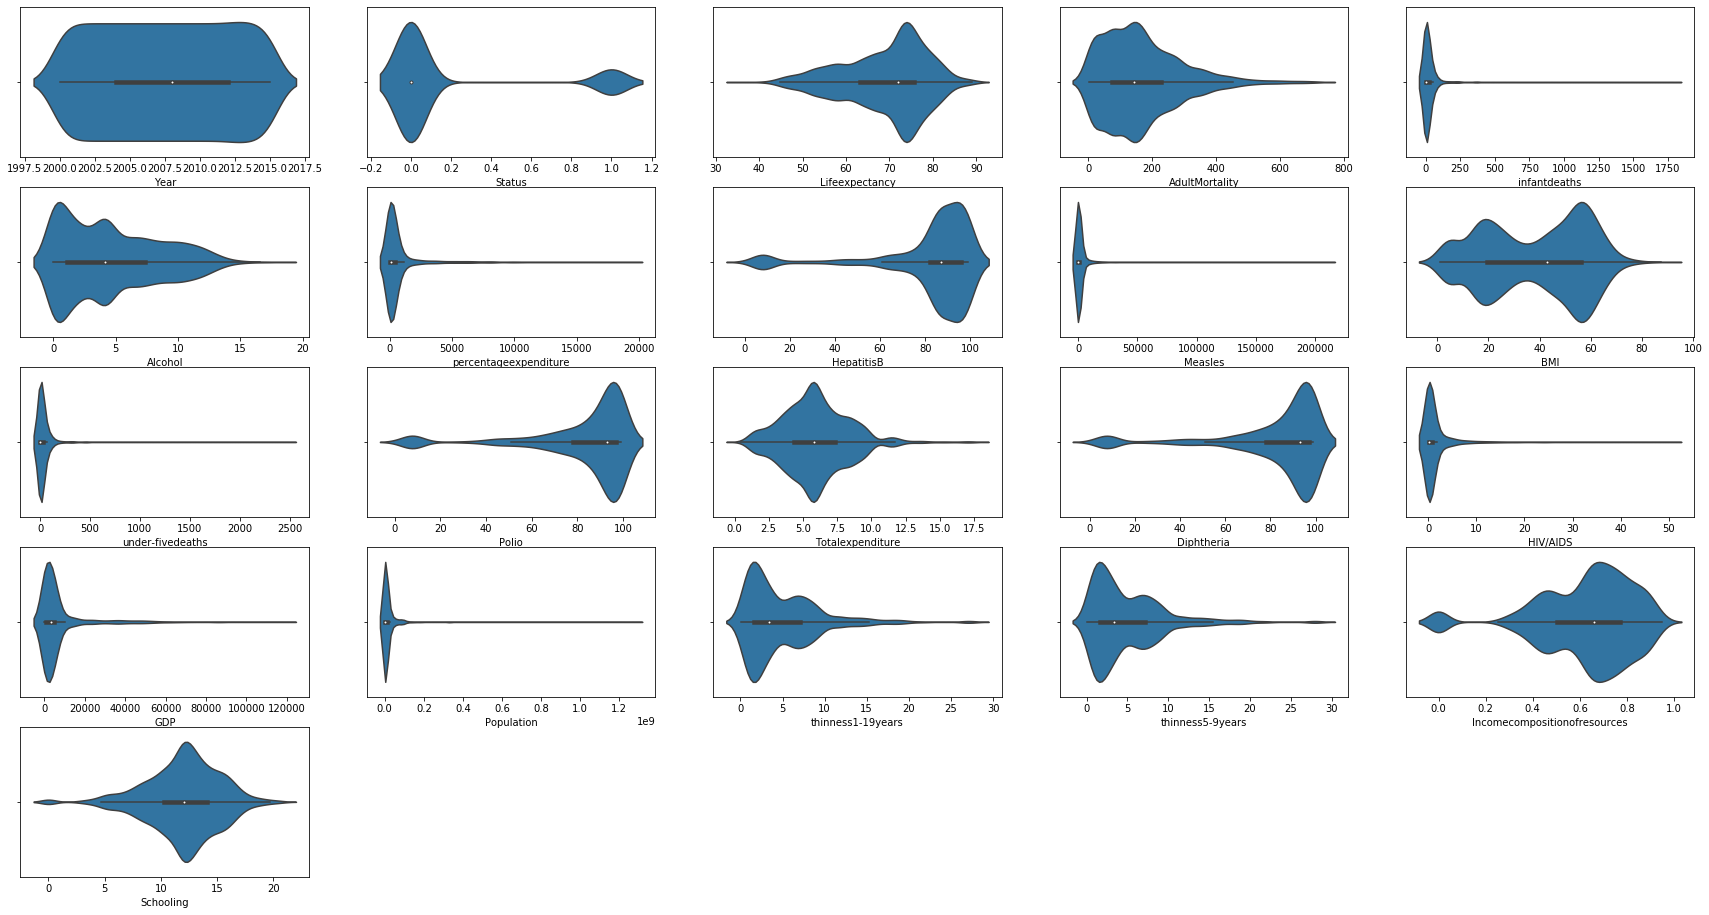

In [34]:
plt.figure(figsize=(30,16))
i = 1
for col in df.columns:
    plt.subplot(5,5,i)
    sns.violinplot(df[col])
    i += 1

In [35]:
df = df[(np.abs(stats.zscore(df)) <= 2.5).all(axis=1)]

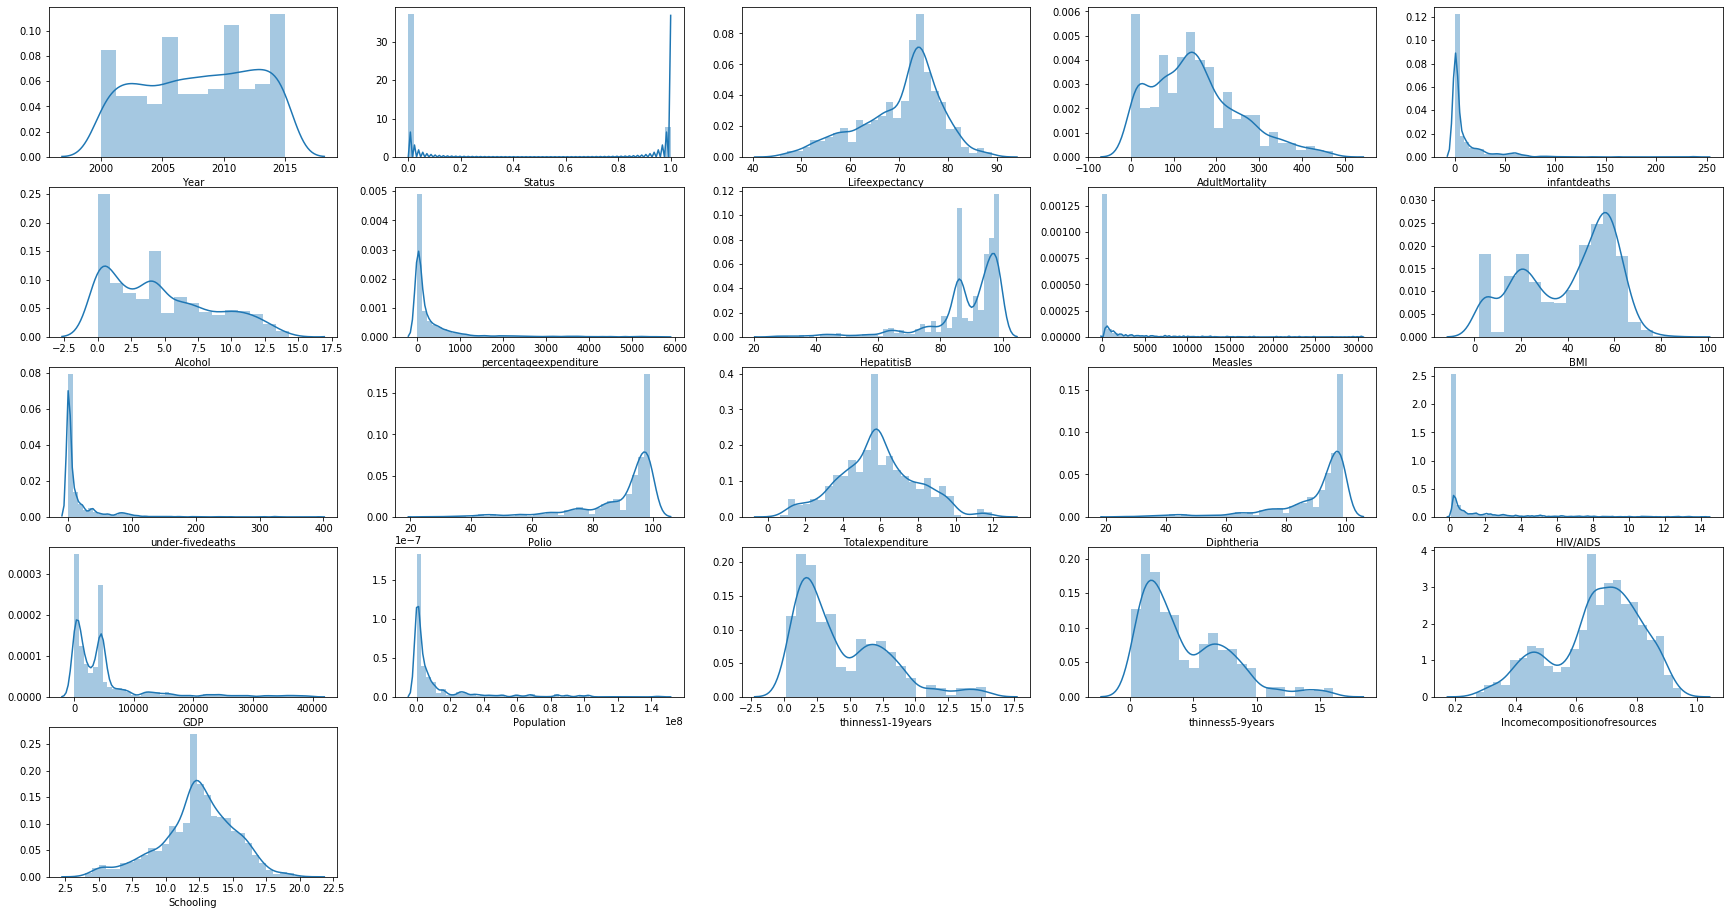

In [36]:
plt.figure(figsize=(30,16))
i = 1
for col in df.columns:
    plt.subplot(5,5,i)
    sns.distplot(df[col])
    i += 1

In [37]:
for col in df.columns:
    df[f'{col}_bin']=pd.cut(df[col],bins=3,labels=[0,1,2])
    df[f'{col}_bin_two']=pd.cut(df[col],bins=2,labels=[0,1])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, Afghanistan to Zimbabwe
Data columns (total 63 columns):
Year                                    2044 non-null int64
Status                                  2044 non-null int64
Lifeexpectancy                          2044 non-null float64
AdultMortality                          2044 non-null float64
infantdeaths                            2044 non-null int64
Alcohol                                 2044 non-null float64
percentageexpenditure                   2044 non-null float64
HepatitisB                              2044 non-null float64
Measles                                 2044 non-null int64
BMI                                     2044 non-null float64
under-fivedeaths                        2044 non-null int64
Polio                                   2044 non-null float64
Totalexpenditure                        2044 non-null float64
Diphtheria                              2044 non-null float64
HIV/AIDS                  

In [39]:
df.head()

Year  Status  Lifeexpectancy  AdultMortality  infantdeaths  \
Country                                                                   
Afghanistan  2001       0            55.3           316.0            88   
Albania      2006       0            74.2            99.0             1   
Albania      2000       0            72.6            11.0             1   
Albania      2001       0            73.6            14.0             1   
Albania      2002       0            73.3            15.0             1   

             Alcohol  percentageexpenditure  HepatitisB  Measles   BMI  ...  \
Country                                                                 ...   
Afghanistan     0.01              10.574728        63.0     8762  12.6  ...   
Albania         5.31               3.302154        98.0       68   5.8  ...   
Albania         3.66              91.711541        96.0      662  45.0  ...   
Albania         4.25              96.205571        96.0       18  46.0  ...   
Albania         3.73             104.516916        96.0       16  46.9  ...   

             Population_bin  Population_bin_two  thinness1-19years_bin  \
Country                                                                  
Afghanistan               0                   0                      0   
Albania                   0                   0                      0   
Albania                   0                   0                      0   
Albania                   0                   0                      0   
Albania                   0                   0                      0   

             thinness1-19years_bin_two  thinness5-9years_bin  \
Country                                                        
Afghanistan                          0                     0   
Albania                              0                     0   
Albania                              0                     0   
Albania                              0                     0   
Albania                              0                     0   

             thinness5-9years_bin_two  Incomecompositionofresources_bin  \
Country                                                                   
Afghanistan                         0                                 0   
Albania                             0                                 1   
Albania                             0                                 1   
Albania                             0                                 1   
Albania                             0                                 1   

             Incomecompositionofresources_bin_two  Schooling_bin  \
Country                                                            
Afghanistan                                     0              0   
Albania                                         1              1   
Albania                                         1              1   
Albania                                         1              1   
Albania                                         1              1   

             Schooling_bin_two  
Country                         
Afghanistan                  0  
Albania                      0  
Albania                      0  
Albania                      0  
Albania                      0  

[5 rows x 63 columns]

In [40]:
df.columns

Index(['Year', 'Status', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths',
       'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling',
       'Year_bin', 'Year_bin_two', 'Status_bin', 'Status_bin_two',
       'Lifeexpectancy_bin', 'Lifeexpectancy_bin_two', 'AdultMortality_bin',
       'AdultMortality_bin_two', 'infantdeaths_bin', 'infantdeaths_bin_two',
       'Alcohol_bin', 'Alcohol_bin_two', 'percentageexpenditure_bin',
       'percentageexpenditure_bin_two', 'HepatitisB_bin', 'HepatitisB_bin_two',
       'Measles_bin', 'Measles_bin_two', 'BMI_bin', 'BMI_bin_two',
       'under-fivedeaths_bin', 'under-fivedeaths_bin_two', 'Polio_bin',
       'Polio_bin_two', 'Totalexpenditure_bin', 'Totalexpenditure_bin_two',
       'Diphtheria_bin', 'Diphtheria_bin_two', 'HIV/AIDS_bi

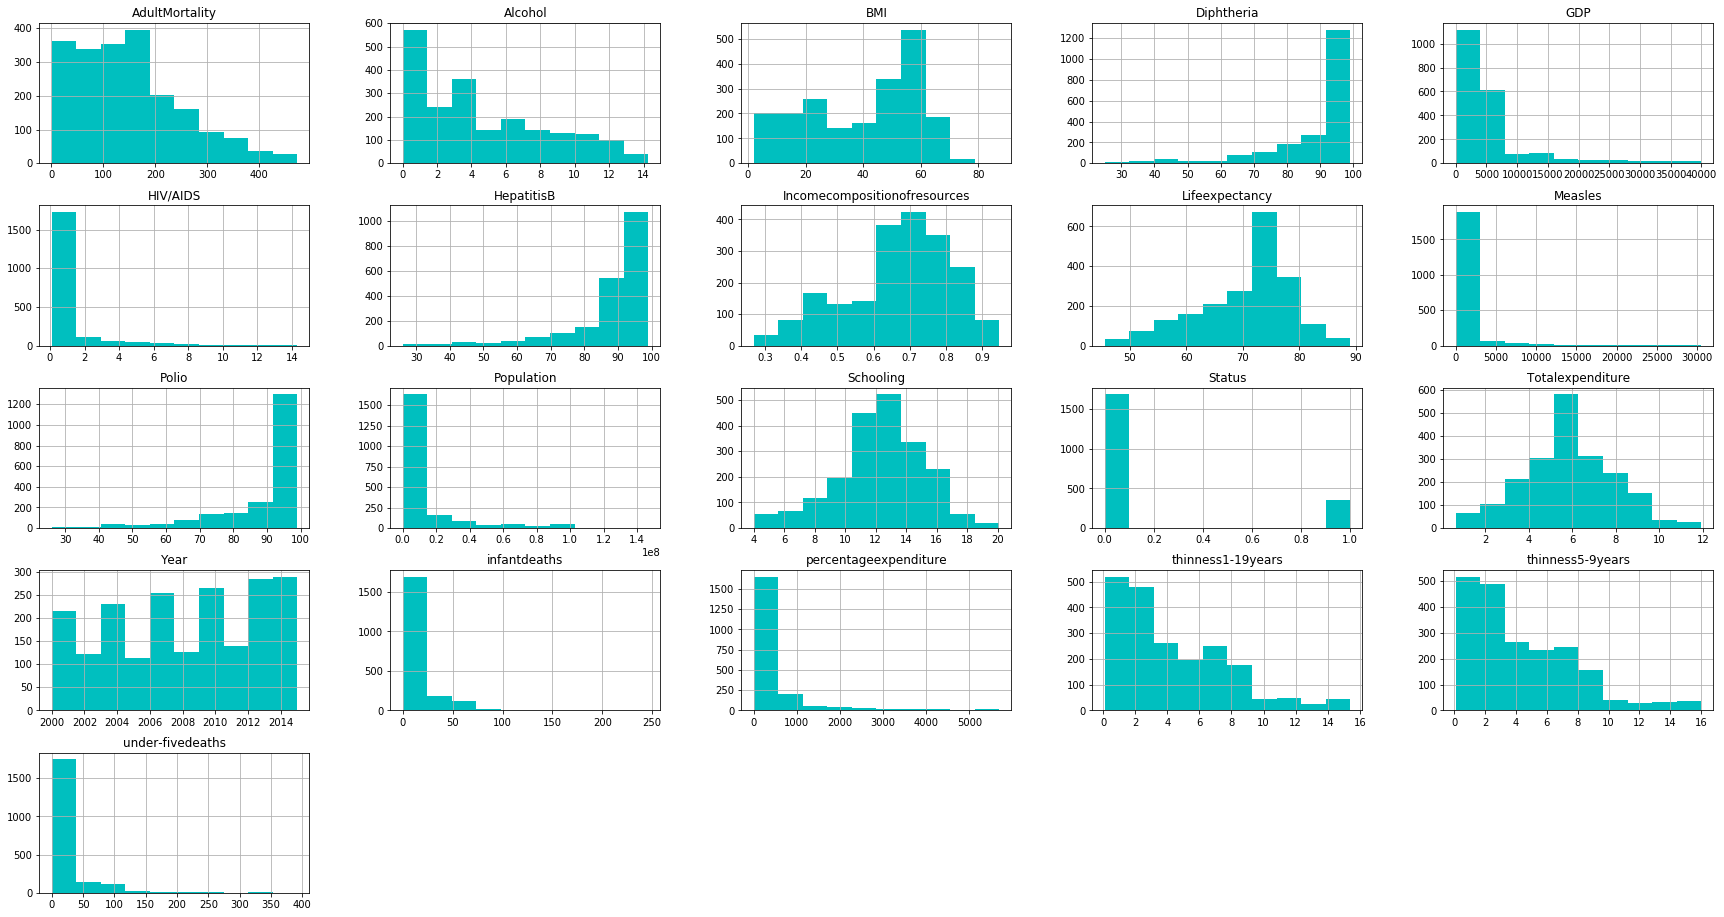

In [41]:
df.hist(figsize=(30,16),color='c')
plt.show()

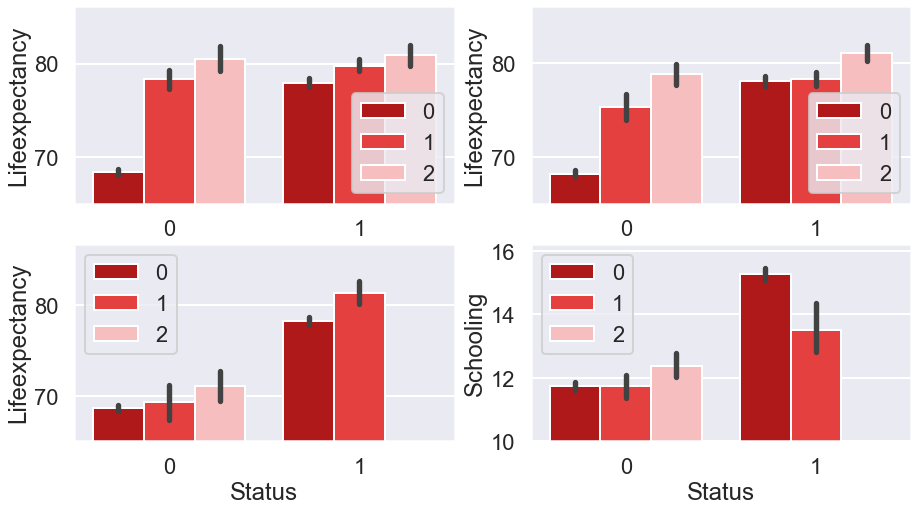

In [42]:
with sns.axes_style('darkgrid'):
    with sns.plotting_context("poster"):
        with sns.color_palette("seismic_r"):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(2,2,1)
            sns.barplot(df['Status'],df['Lifeexpectancy'],hue=df['percentageexpenditure_bin'])
            plt.legend(loc='best')
            plt.ylim(65,)
            
            plt.subplot(2,2,2)
            sns.barplot(df['Status'],df['Lifeexpectancy'],hue=df['GDP_bin'])
            plt.legend(loc='best')
            plt.ylim(65,)

            plt.subplot(2,2,3)
            sns.barplot(df['Status'],df['Lifeexpectancy'],hue=df['Population_bin'])
            plt.legend(loc='best')
            plt.ylim(65,)
            
            plt.subplot(2,2,4)
            sns.barplot(df['Status'],df['Schooling'],hue=df['Population_bin'])
            plt.legend(loc='best')
            plt.ylim(10,)

            plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


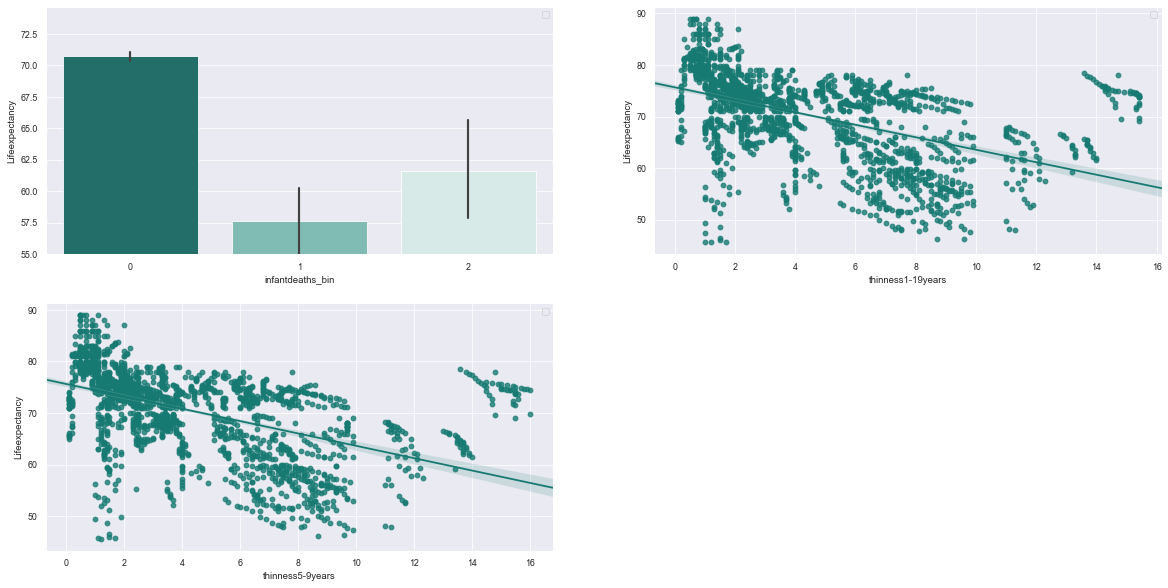

In [43]:
with sns.axes_style('darkgrid'):
    with sns.plotting_context("paper"):
        with sns.color_palette("BrBG_r"):
            
            plt.figure(figsize=(20,10))
            
            plt.subplot(2,2,1)
            sns.barplot(df['infantdeaths_bin'],df['Lifeexpectancy'])
            plt.legend(loc='best')
            plt.ylim(55,)
            
            plt.subplot(2,2,2)
            sns.regplot(df['thinness1-19years'],df['Lifeexpectancy'])
            plt.legend(loc='best')
            
            plt.subplot(2,2,3)
            sns.regplot(df['thinness5-9years'],df['Lifeexpectancy'])
            plt.legend(loc='best')

            plt.show()

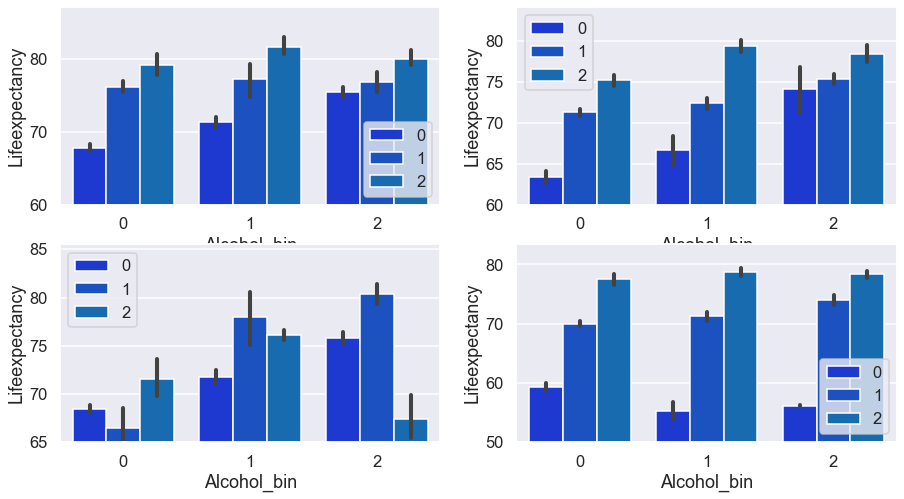

In [44]:
with sns.axes_style('darkgrid'):
    with sns.plotting_context("talk"):
        with sns.color_palette("winter"):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(2,2,1)
            sns.barplot(df['Alcohol_bin'],df['Lifeexpectancy'],hue=df['GDP_bin'])
            plt.legend(loc='best')
            plt.ylim(60,)

            plt.subplot(2,2,2)
            sns.barplot(df['Alcohol_bin'],df['Lifeexpectancy'],hue=df['BMI_bin'])
            plt.legend(loc='best')
            plt.ylim(60,)

            plt.subplot(2,2,3)
            sns.barplot(df['Alcohol_bin'],df['Lifeexpectancy'],hue=df['Population_bin'])
            plt.legend(loc='best')
            plt.ylim(65,)
            
            plt.subplot(2,2,4)
            sns.barplot(df['Alcohol_bin'],df['Lifeexpectancy'],hue=df['Schooling_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)

            plt.show()

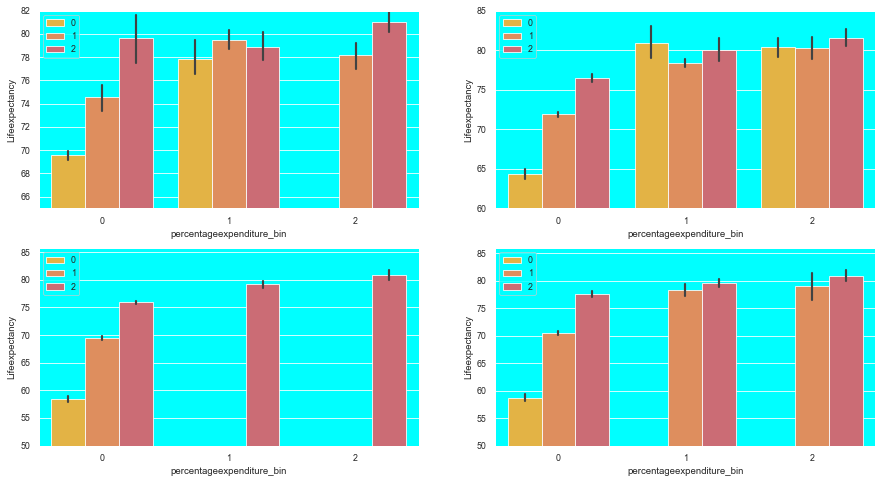

In [45]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'aqua'}):
    with sns.plotting_context("paper"):
        with sns.color_palette("plasma_r"):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(2,2,1)
            sns.barplot(df['percentageexpenditure_bin'],df['Lifeexpectancy'],hue=df['GDP_bin'])
            plt.legend(loc='best')
            plt.ylim(65,82)

            plt.subplot(2,2,2)
            sns.barplot(df['percentageexpenditure_bin'],df['Lifeexpectancy'],hue=df['BMI_bin'])
            plt.legend(loc='best')
            plt.ylim(60,85)

            plt.subplot(2,2,3)
            sns.barplot(df['percentageexpenditure_bin'],df['Lifeexpectancy'],hue=df['Incomecompositionofresources_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.subplot(2,2,4)
            sns.barplot(df['percentageexpenditure_bin'],df['Lifeexpectancy'],hue=df['Schooling_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.show()

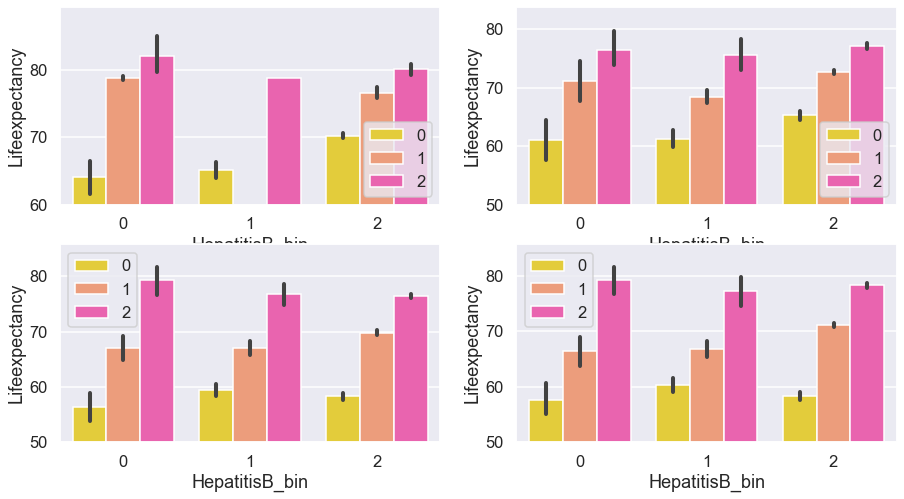

In [46]:
with sns.axes_style('darkgrid'):
    with sns.plotting_context("talk"):
        with sns.color_palette("gnuplot2_r"):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(2,2,1)
            sns.barplot(df['HepatitisB_bin'],df['Lifeexpectancy'],hue=df['GDP_bin'])
            plt.legend(loc='best')
            plt.ylim(60,)

            plt.subplot(2,2,2)
            sns.barplot(df['HepatitisB_bin'],df['Lifeexpectancy'],hue=df['BMI_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)

            plt.subplot(2,2,3)
            sns.barplot(df['HepatitisB_bin'],df['Lifeexpectancy'],hue=df['Incomecompositionofresources_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.subplot(2,2,4)
            sns.barplot(df['HepatitisB_bin'],df['Lifeexpectancy'],hue=df['Schooling_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.show()

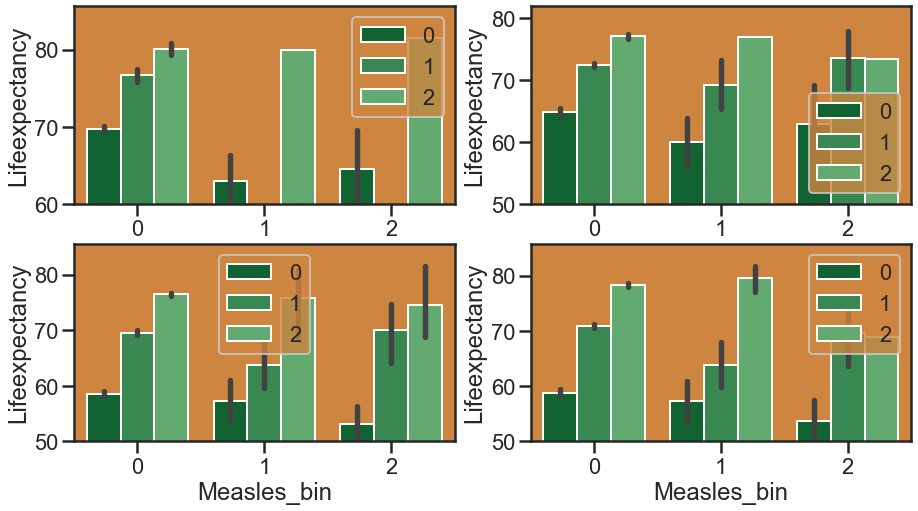

In [47]:
with sns.axes_style('ticks',{'axes.facecolor': 'peru'}):
    with sns.plotting_context("poster"):
        with sns.color_palette("Greens_r"):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(2,2,1)
            sns.barplot(df['Measles_bin'],df['Lifeexpectancy'],hue=df['GDP_bin'])
            plt.legend(loc='best')
            plt.ylim(60,)

            plt.subplot(2,2,2)
            sns.barplot(df['Measles_bin'],df['Lifeexpectancy'],hue=df['BMI_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)

            plt.subplot(2,2,3)
            sns.barplot(df['Measles_bin'],df['Lifeexpectancy'],hue=df['Incomecompositionofresources_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.subplot(2,2,4)
            sns.barplot(df['Measles_bin'],df['Lifeexpectancy'],hue=df['Schooling_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.show()

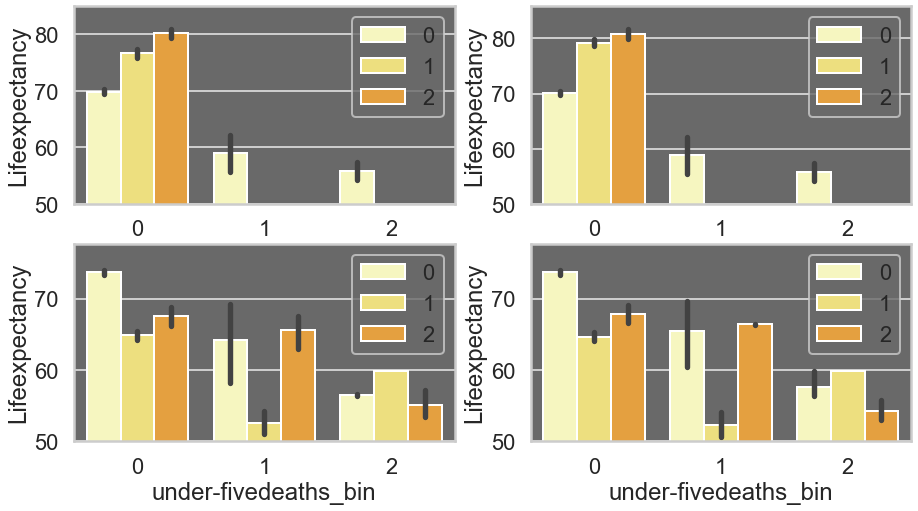

In [48]:
with sns.axes_style('whitegrid',{'axes.facecolor': 'dimgray'}):
    with sns.plotting_context("poster"):
        with sns.color_palette("afmhot_r"):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(2,2,1)
            sns.barplot(df['under-fivedeaths_bin'],df['Lifeexpectancy'],hue=df['GDP_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)

            plt.subplot(2,2,2)
            sns.barplot(df['under-fivedeaths_bin'],df['Lifeexpectancy'],hue=df['percentageexpenditure_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)

            plt.subplot(2,2,3)
            sns.barplot(df['under-fivedeaths_bin'],df['Lifeexpectancy'],hue=df['thinness1-19years_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.subplot(2,2,4)
            sns.barplot(df['under-fivedeaths_bin'],df['Lifeexpectancy'],hue=df['thinness5-9years_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.show()

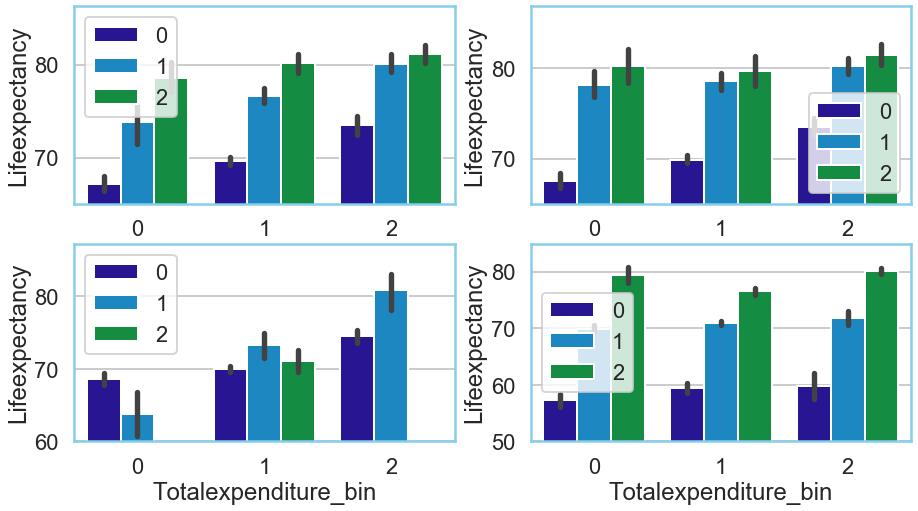

In [49]:
with sns.axes_style('whitegrid',{'axes.edgecolor': 'skyblue'}):
    with sns.plotting_context("poster"):
        with sns.color_palette("nipy_spectral"):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(2,2,1)
            sns.barplot(df['Totalexpenditure_bin'],df['Lifeexpectancy'],hue=df['GDP_bin'])
            plt.legend(loc='best')
            plt.ylim(65,)

            plt.subplot(2,2,2)
            sns.barplot(df['Totalexpenditure_bin'],df['Lifeexpectancy'],hue=df['percentageexpenditure_bin'])
            plt.legend(loc='best')
            plt.ylim(65,)

            plt.subplot(2,2,3)
            sns.barplot(df['Totalexpenditure_bin'],df['Lifeexpectancy'],hue=df['Population_bin'])
            plt.legend(loc='best')
            plt.ylim(60,)
            
            plt.subplot(2,2,4)
            sns.barplot(df['Totalexpenditure_bin'],df['Lifeexpectancy'],hue=df['Schooling_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.show()

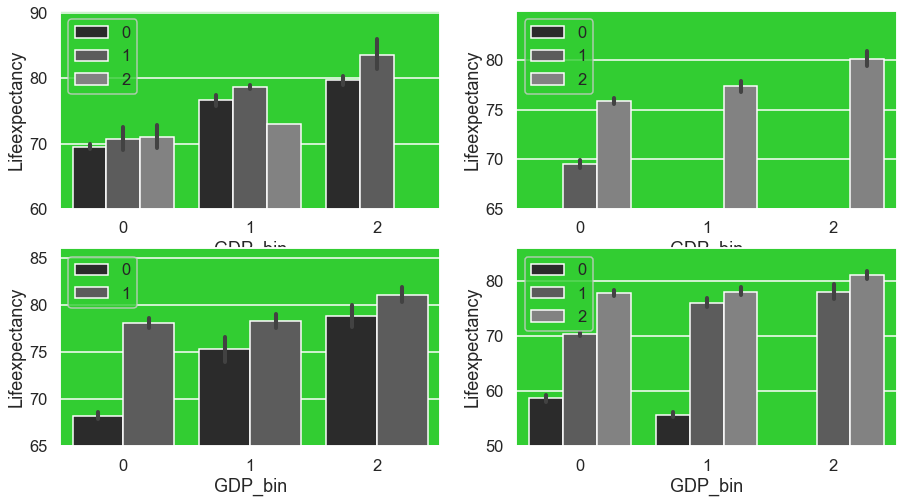

In [50]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'limegreen'}):
    with sns.plotting_context("talk"):
        with sns.color_palette("Greys_r"):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(2,2,1)
            sns.barplot(df['GDP_bin'],df['Lifeexpectancy'],hue=df['Population_bin'])
            plt.legend(loc='best')
            plt.ylim(60,)

            plt.subplot(2,2,2)
            sns.barplot(df['GDP_bin'],df['Lifeexpectancy'],hue=df['Incomecompositionofresources_bin'])
            plt.legend(loc='best')
            plt.ylim(65,)

            plt.subplot(2,2,3)
            sns.barplot(df['GDP_bin'],df['Lifeexpectancy'],hue=df['Status'])
            plt.legend(loc='best')
            plt.ylim(65,)
            
            plt.subplot(2,2,4)
            sns.barplot(df['GDP_bin'],df['Lifeexpectancy'],hue=df['Schooling_bin'])
            plt.legend(loc='best')
            plt.ylim(50,)
            
            plt.show()

## End target feature correlation EDA

In [51]:
country_df.head()

Country    Year  Lifeexpectancy  AdultMortality  infantdeaths  \
0          Afghanistan  2007.5        58.19375        269.0625       78.2500   
1              Albania  2007.5        75.15625         45.0625        0.6875   
2              Algeria  2007.5        73.61875        108.1875       20.3125   
3               Angola  2007.5        49.01875        328.5625       83.7500   
4  Antigua and Barbuda  2007.5        75.05625        127.5000        0.0000   

    Alcohol  percentageexpenditure  HepatitisB    Measles       BMI  ...  \
0  0.014375              34.960110     64.5625  2362.2500  15.51875  ...   
1  4.848750             193.259091     98.0000    53.3750  49.06875  ...   
2  0.643750             236.185241     80.0000  1943.8750  48.74375  ...   
3  5.644375             102.100268     77.1250  3561.3125  18.01875  ...   
4  7.715000            1001.585226     97.5000     0.0000  38.42500  ...   

     Polio  Totalexpenditure  Diphtheria  HIV/AIDS          GDP    Population  \
0  48.3750          8.252500     52.3125   0.10000   340.015425  9.972260e+06   
1  98.1250          5.945625     98.0625   0.10000  2119.726679  6.969116e+05   
2  91.7500          4.678750     91.8750   0.10000  2847.853392  2.164983e+07   
3  46.1250          4.036875     47.6875   2.36875  1975.143045  1.014710e+07   
4  96.9375          4.854375     98.3125   0.12500  9759.305728  9.628600e+04   

   thinness1-19years  thinness5-9years  Incomecompositionofresources  \
0           16.58125          15.58125                      0.415375   
1            1.61875           1.70000                      0.709875   
2            6.09375           5.97500                      0.694875   
3            6.19375           6.66875                      0.458375   
4            3.42500           3.37500                      0.488625   

   Schooling  
0    8.21250  
1   12.13750  
2   12.71250  
3    8.04375  
4    8.84375  

[5 rows x 21 columns]

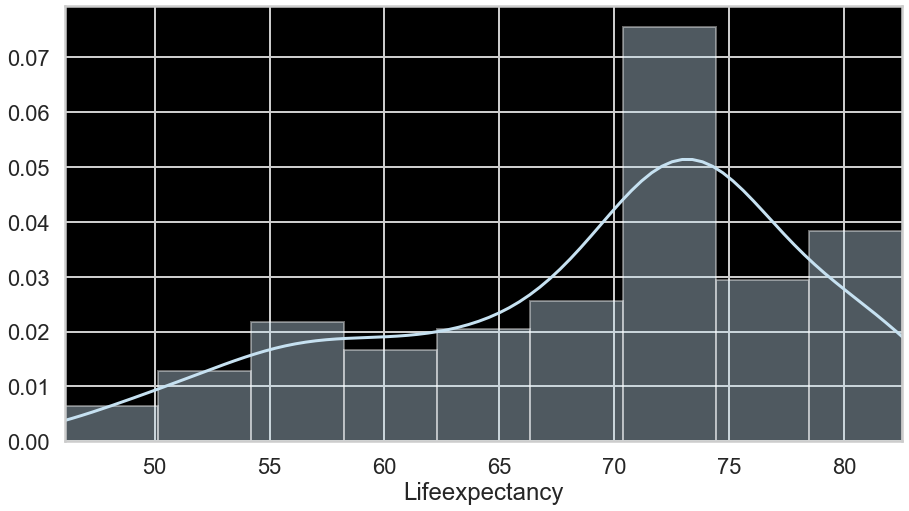

In [52]:
with sns.axes_style('whitegrid',{'axes.facecolor': 'k'}):
    with sns.plotting_context('poster'):
        with sns.color_palette('cubehelix_r'):
            plt.figure(figsize=(15,8))
            sns.distplot(country_df['Lifeexpectancy'])
            plt.xlim(country_df['Lifeexpectancy'].min(),country_df['Lifeexpectancy'].max())
            plt.show()

In [53]:
l1=country_df[country_df.Lifeexpectancy>81.5].Country
v1=country_df[country_df.Lifeexpectancy>81.5].Lifeexpectancy

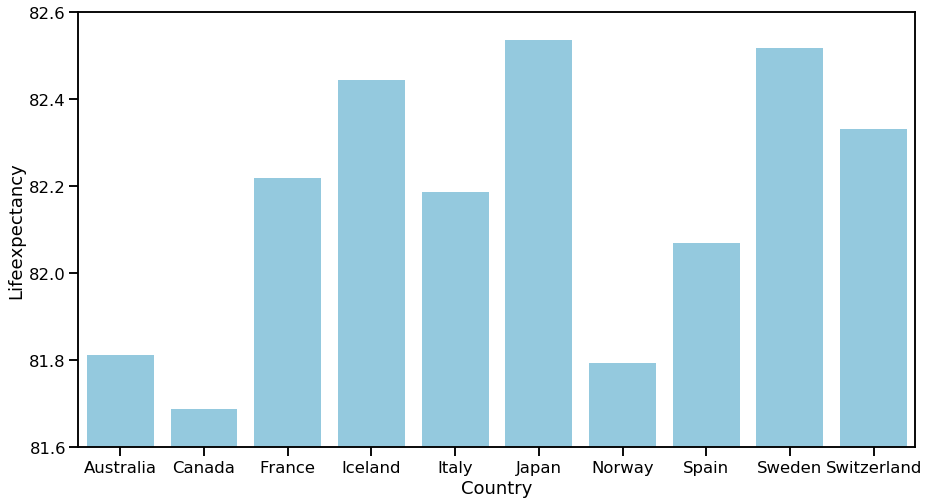

In [54]:
with sns.plotting_context('talk'):
    with sns.color_palette('icefire_r'):
        plt.figure(figsize=(15,8))
        sns.barplot(l1,v1,color='skyblue')
        plt.ylim(81.6,82.6)
        plt.show()

In [55]:
l2=country_df[country_df.Lifeexpectancy<51.5].Country
v2=country_df[country_df.Lifeexpectancy<51.5].Lifeexpectancy

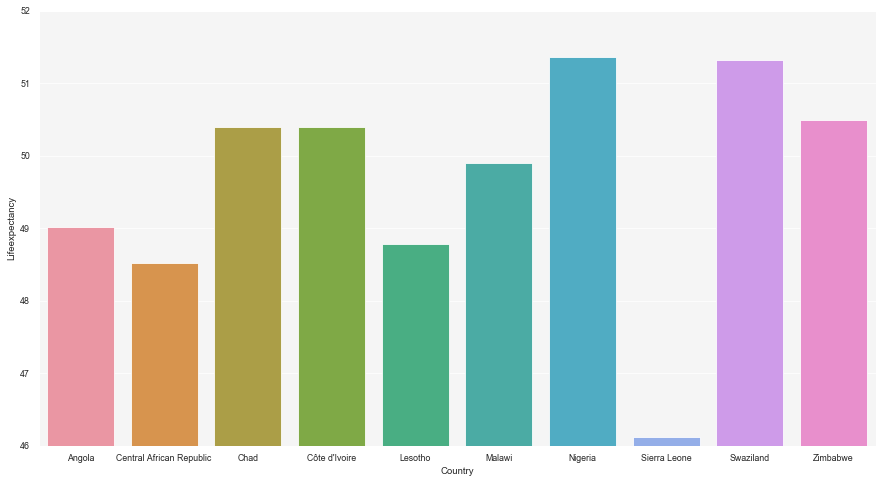

In [56]:
with sns.plotting_context('paper'):
    with sns.color_palette('icefire'):
        with sns.axes_style('darkgrid',{'axes.facecolor': 'whitesmoke'}):
            plt.figure(figsize=(15,8))
            sns.barplot(l2,v2)
            plt.ylim(46,52)
            plt.show()

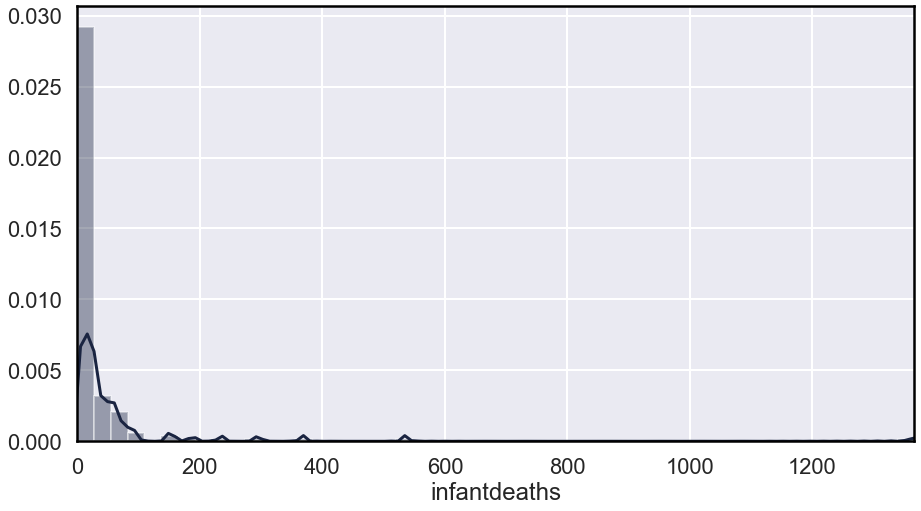

In [57]:
with sns.axes_style('darkgrid',{'axes.edgecolor': 'black'}):
    with sns.plotting_context('poster'):
        with sns.color_palette('cubehelix'):
            plt.figure(figsize=(15,8))
            sns.distplot(country_df['infantdeaths'])
            plt.xlim(country_df['infantdeaths'].min(),country_df['infantdeaths'].max())
            plt.show()

In [58]:
country_df[country_df.infantdeaths>82].shape

(11, 21)

In [59]:
l3=country_df[country_df.infantdeaths>82].Country
v3=country_df[country_df.infantdeaths>82].infantdeaths

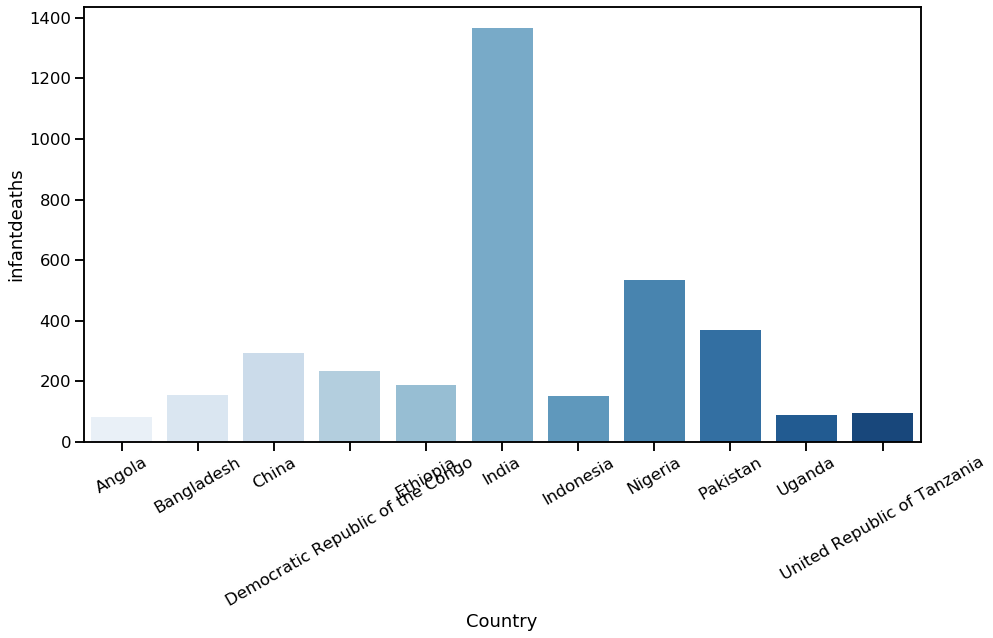

In [60]:
with sns.plotting_context('talk'):
    with sns.color_palette('icefire_r'):
        plt.figure(figsize=(15,8))
        g=sns.barplot(l3,v3,palette='Blues')
        g.set_xticklabels(rotation=30,labels=l3)
        plt.show()

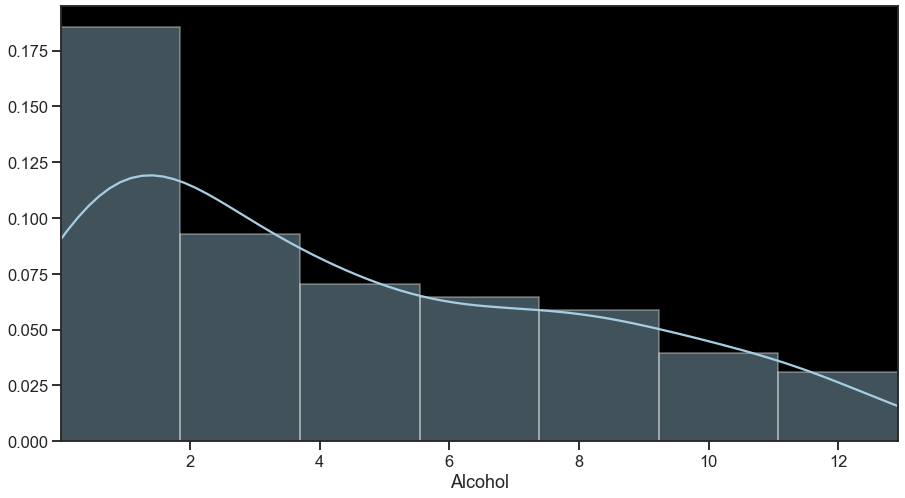

In [61]:
with sns.axes_style('ticks',{'axes.facecolor': 'black'}):
    with sns.plotting_context('talk'):
        with sns.color_palette('Paired'):
            plt.figure(figsize=(15,8))
            sns.distplot(country_df['Alcohol'])
            plt.xlim(country_df['Alcohol'].min(),country_df['Alcohol'].max())
            plt.show()

In [62]:
country_df[country_df.Alcohol>11].shape

(12, 21)

In [63]:
country_df[country_df.Alcohol<0.03].shape

(9, 21)

In [64]:
l4=country_df[country_df.Alcohol>11].Country
v4=country_df[country_df.Alcohol>11].Alcohol
l5=country_df[country_df.Alcohol<0.03].Country
v5=country_df[country_df.Alcohol<0.03].Alcohol

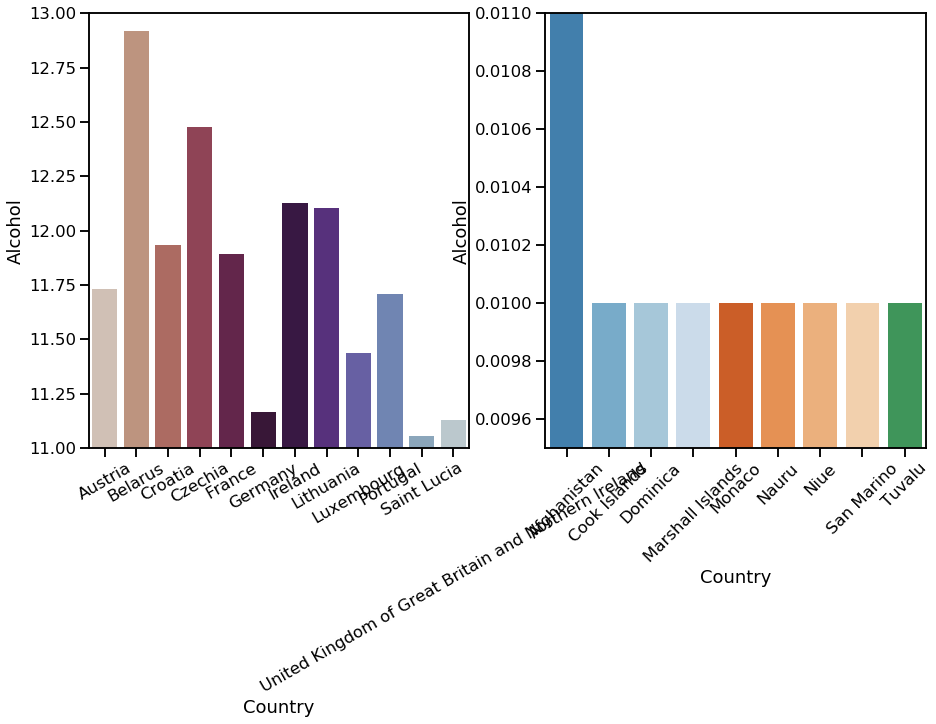

In [65]:
with sns.plotting_context('talk'):
        plt.figure(figsize=(15,8))
        plt.subplot(1,2,1)
        g=sns.barplot(l4,v4,palette='twilight_r')
        g.set_xticklabels(rotation=30,labels=l4)
        plt.ylim(11,13)
        plt.subplot(1,2,2)
        h=sns.barplot(l5,v5,palette='tab20c')
        h.set_xticklabels(rotation=45,labels=l5)
        plt.ylim(0.0095,0.011)
        plt.show()

In [66]:
country_df[country_df.Alcohol<=4].shape

(102, 21)

In [67]:
country_df[country_df.Alcohol>4].shape

(91, 21)

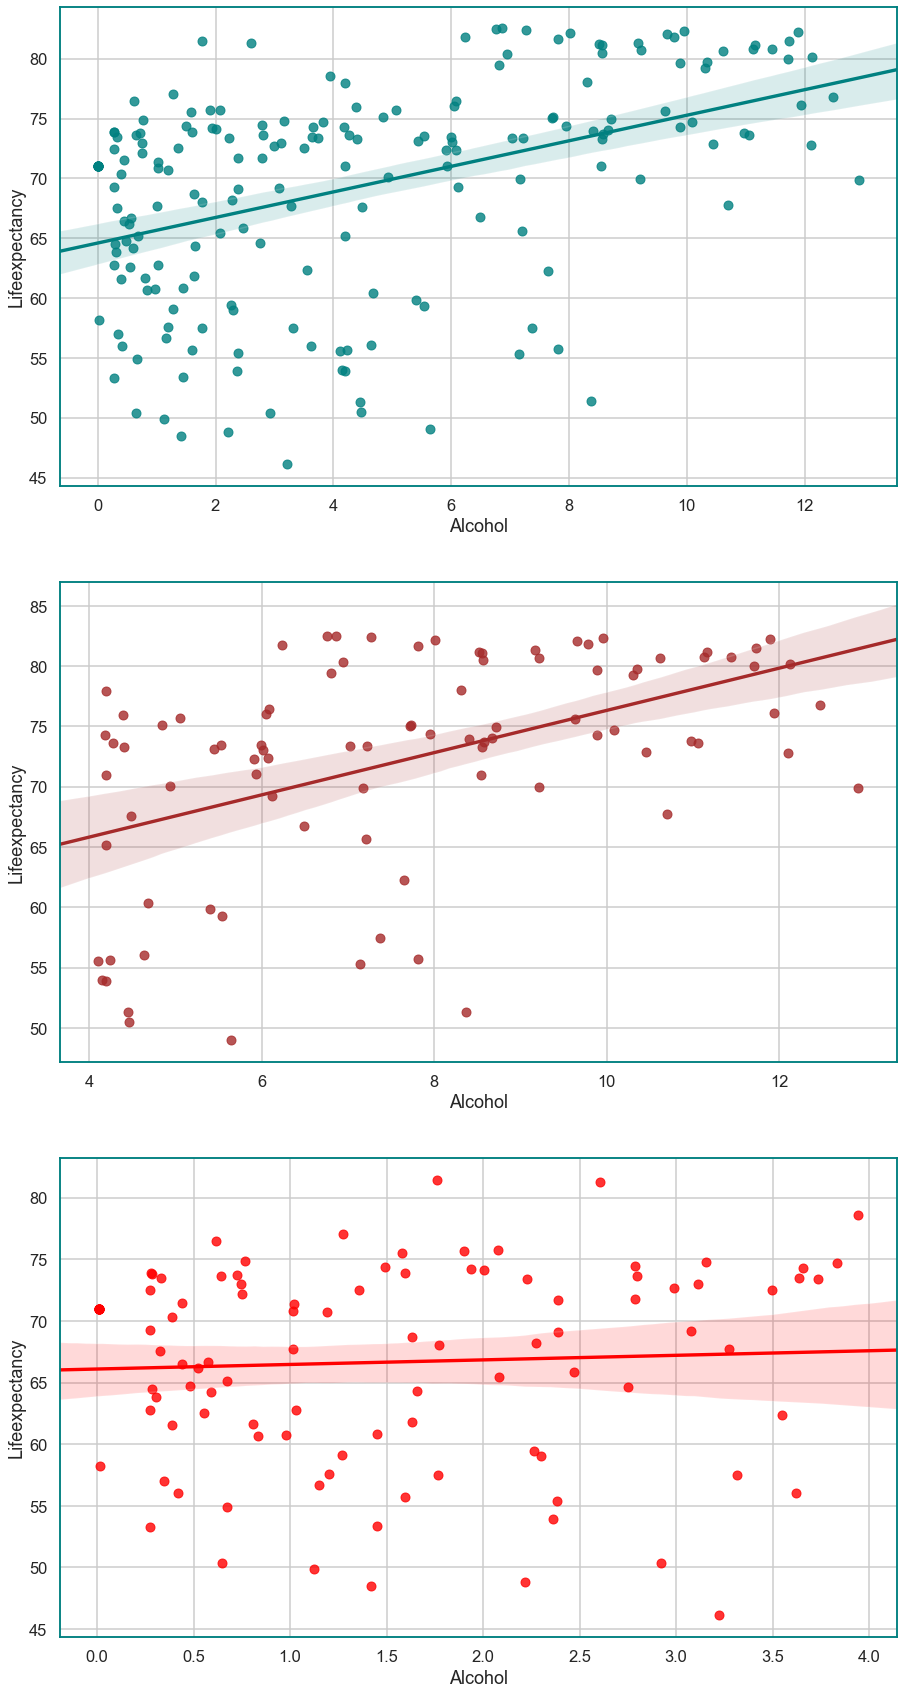

In [68]:
with sns.plotting_context('talk'):
    with sns.axes_style('whitegrid',{'axes.edgecolor': 'teal'}):
        plt.figure(figsize=(15,30))
        plt.subplot(3,1,1)
        sns.regplot(country_df['Alcohol'],country_df.Lifeexpectancy,color='teal')
        plt.subplot(3,1,2)
        sns.regplot(country_df[country_df.Alcohol>4]['Alcohol'],country_df[country_df.Alcohol>4].Lifeexpectancy,color='brown')
        plt.subplot(3,1,3)
        sns.regplot(country_df[country_df.Alcohol<=4]['Alcohol'],country_df[country_df.Alcohol<=4].Lifeexpectancy,color='r')
        plt.show()

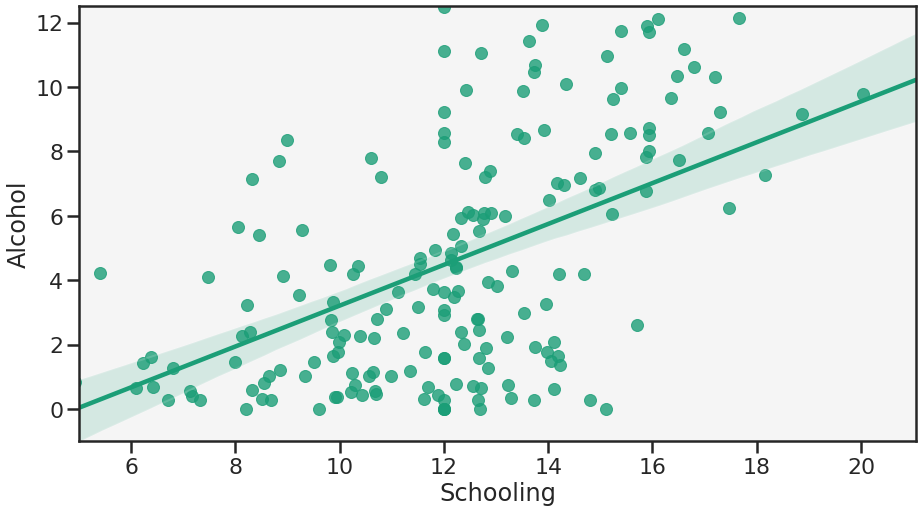

In [69]:
with sns.plotting_context('poster'):
    with sns.axes_style('ticks',{'axes.facecolor': 'whitesmoke'}):
        with sns.color_palette('Dark2'):
            plt.figure(figsize=(15,8))
            plt.subplot(1,1,1)
            sns.regplot(country_df['Schooling'],country_df.Alcohol)
            plt.xlim(5,)
            plt.ylim(-1,12.5)

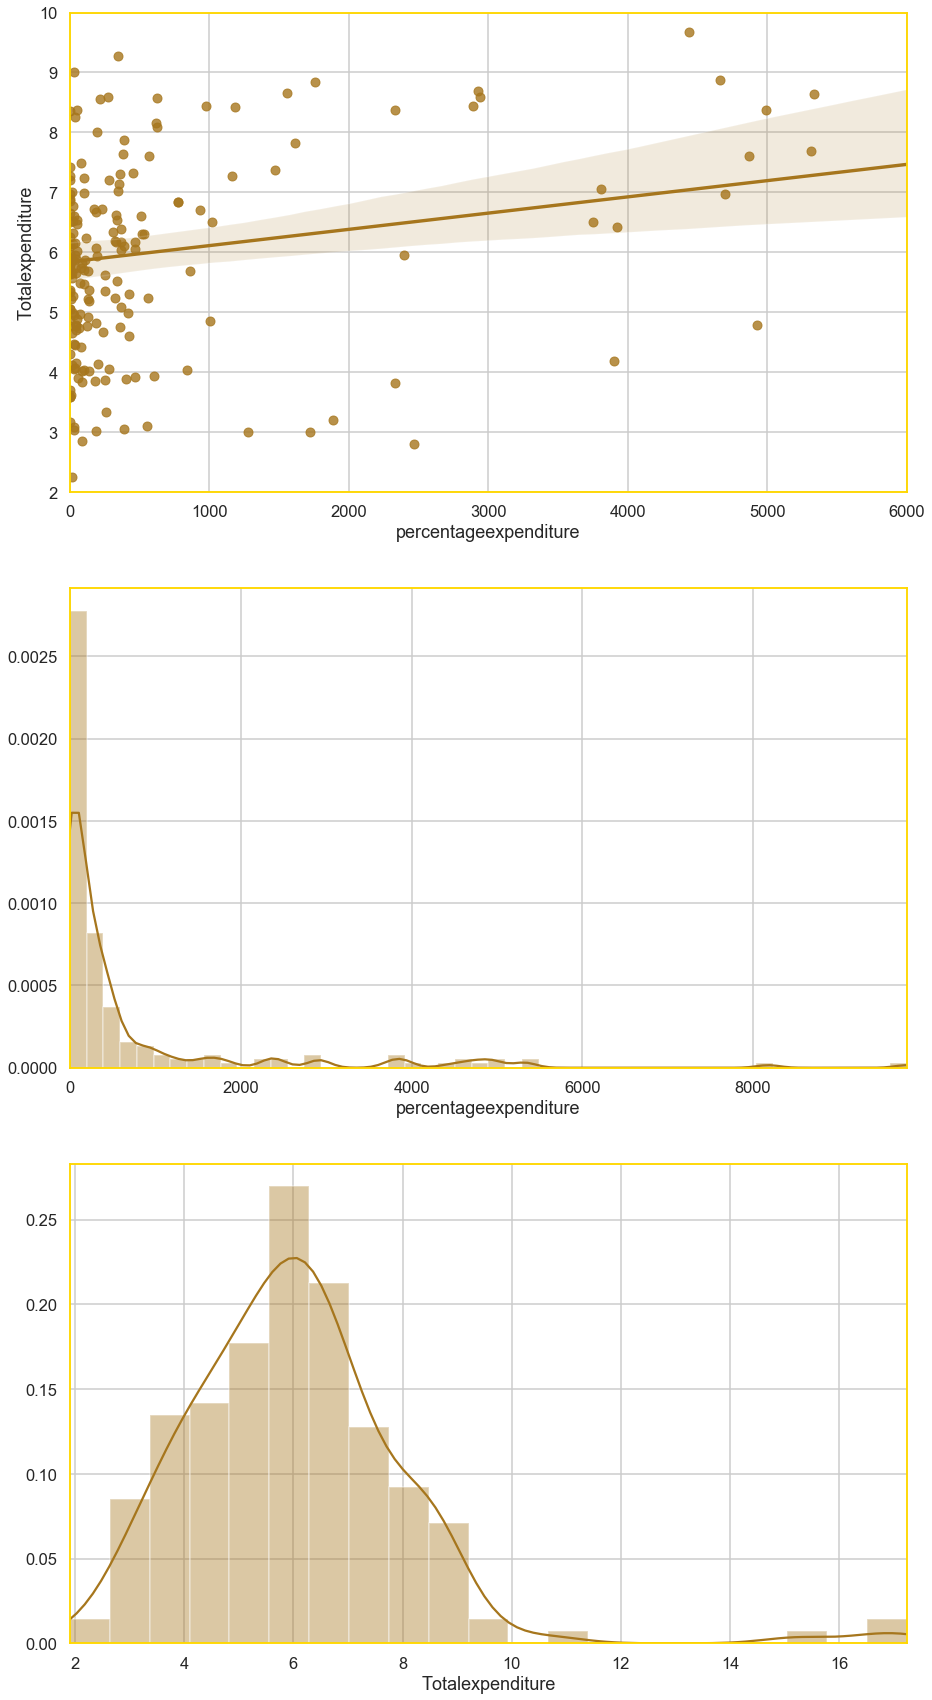

In [70]:
with sns.plotting_context('talk'):
    with sns.axes_style('whitegrid',{'axes.edgecolor': 'gold'}):
        with sns.color_palette('Dark2_r'):
            plt.figure(figsize=(15,30))
            plt.subplot(3,1,1)
            sns.regplot(country_df['percentageexpenditure'],country_df.Totalexpenditure)
            plt.xlim(0,6000)
            plt.ylim(2,10)
            plt.subplot(3,1,2)
            sns.distplot(country_df['percentageexpenditure'])
            plt.xlim(country_df['percentageexpenditure'].min(),country_df['percentageexpenditure'].max())
            plt.subplot(3,1,3)
            sns.distplot(country_df['Totalexpenditure'])
            plt.xlim(country_df['Totalexpenditure'].min(),country_df['Totalexpenditure'].max())
            plt.show()

In [71]:
mms = MinMaxScaler()

In [72]:
a = mms.fit_transform(country_df[['percentageexpenditure']])

In [73]:
b = mms.fit_transform(country_df[['Totalexpenditure']])

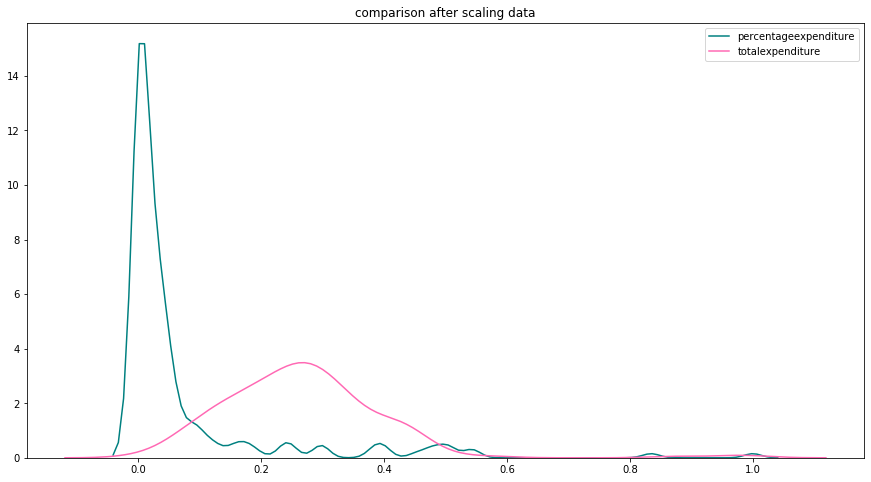

In [74]:
plt.figure(figsize=(15,8))
sns.distplot(a,label='percentageexpenditure',hist=False,color='teal')
sns.distplot(b,label='totalexpenditure',hist=False,color='hotpink')
plt.title('comparison after scaling data')
plt.legend()
plt.show()

In [75]:
country_df[country_df['Totalexpenditure']<3.1].shape

(10, 21)

In [76]:
country_df[country_df['Totalexpenditure']>8.65].shape

(11, 21)

In [77]:
country_df[country_df['percentageexpenditure']>3900].shape

(12, 21)

In [78]:
l6=country_df[country_df['Totalexpenditure']<3.1].Country
v6=country_df[country_df['Totalexpenditure']<3.1].Totalexpenditure
l7=country_df[country_df['Totalexpenditure']>8.65].Country
v7=country_df[country_df['Totalexpenditure']>8.65].Totalexpenditure
l8=country_df[country_df['percentageexpenditure']>3900].Country
v8=country_df[country_df['percentageexpenditure']>3900].Totalexpenditure

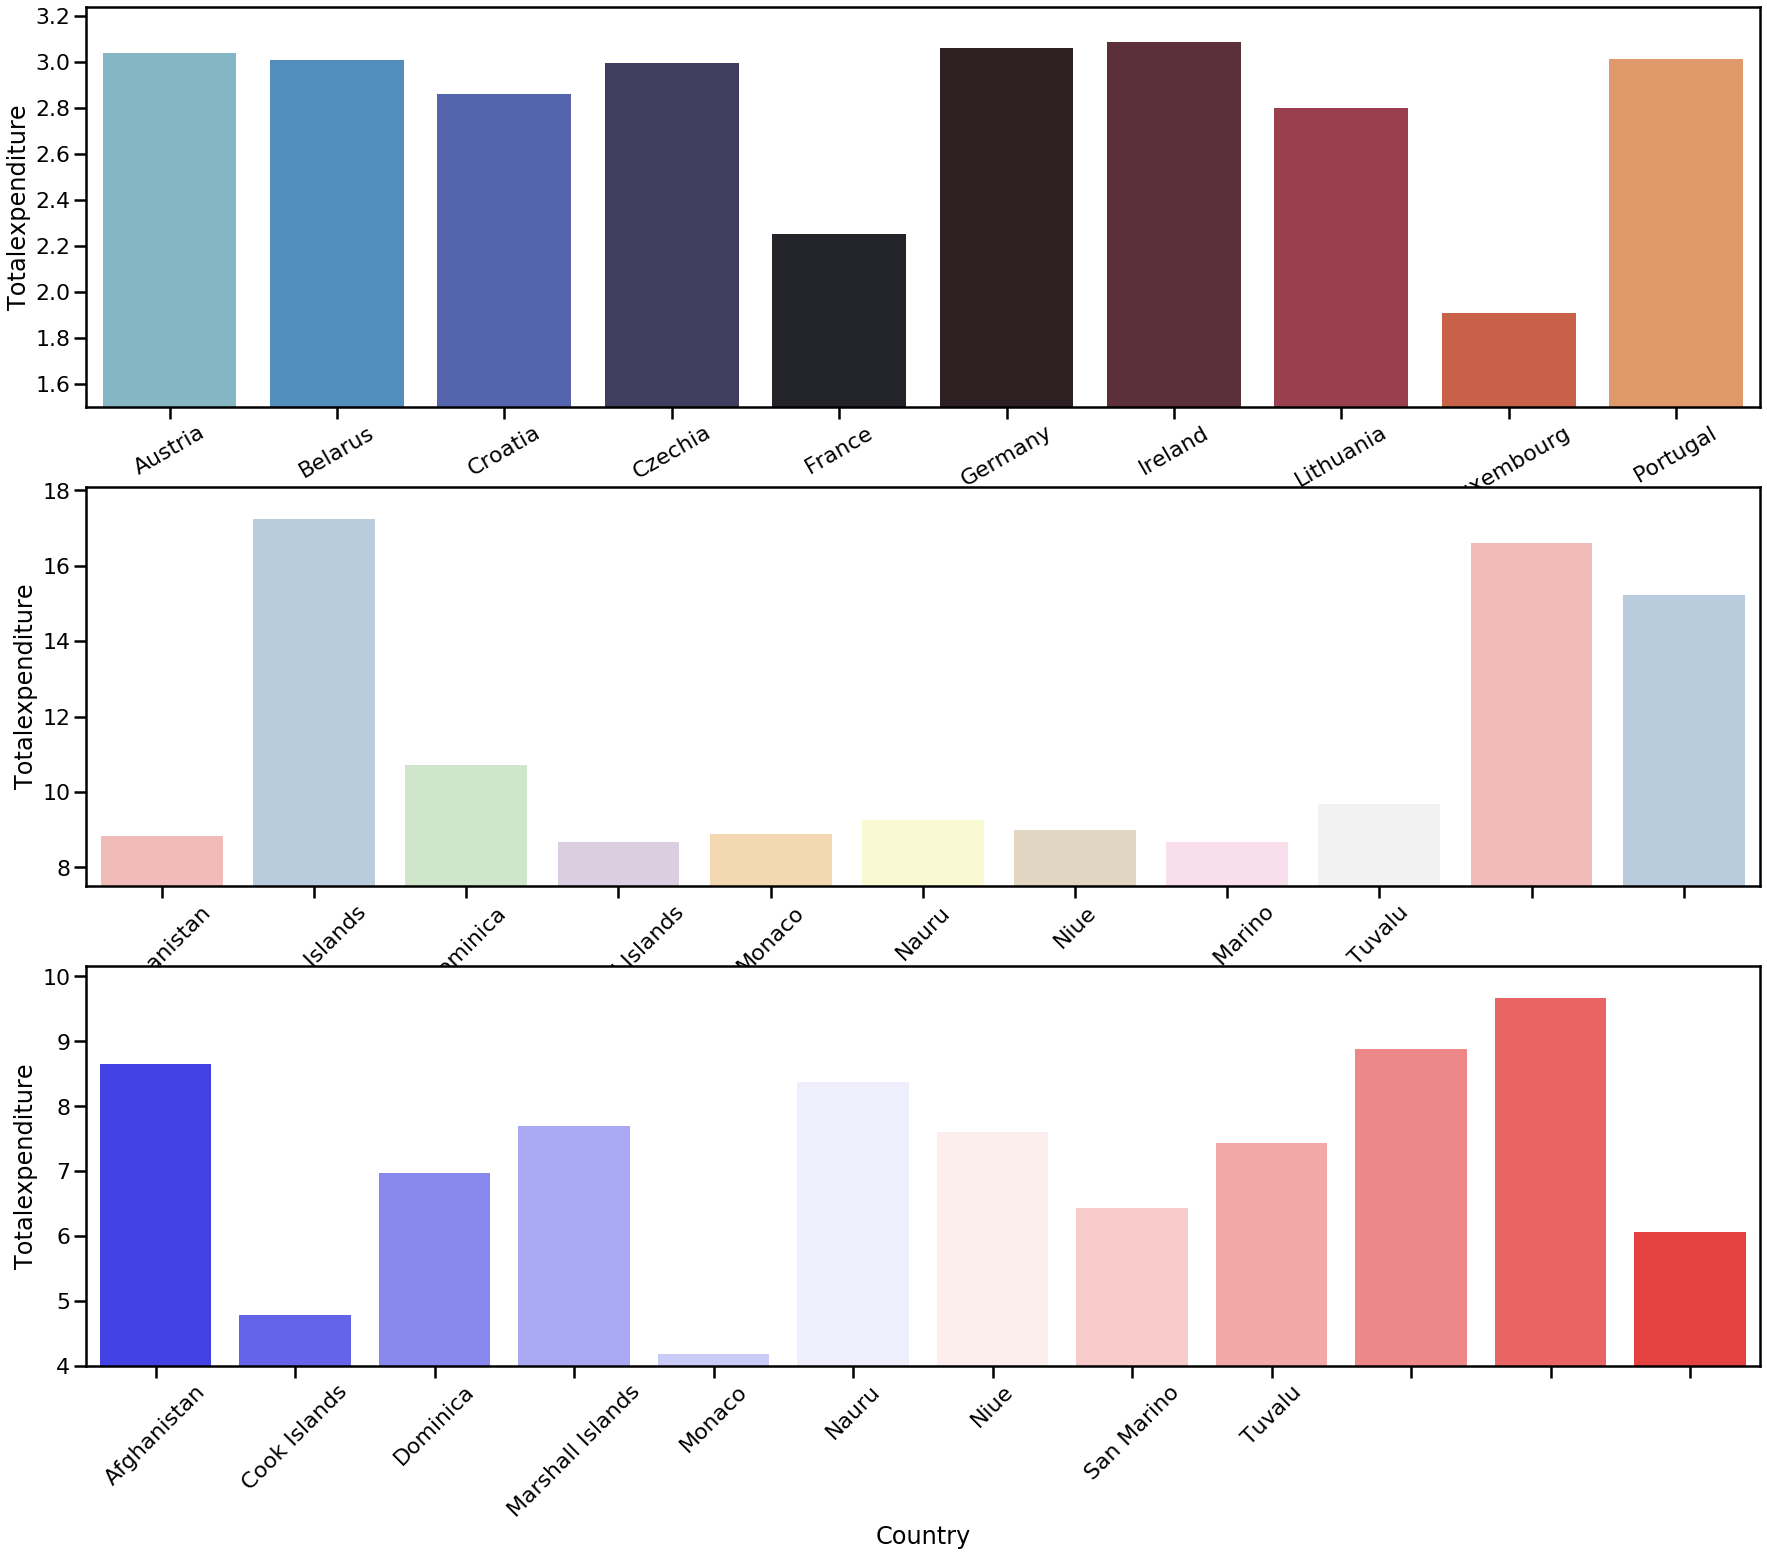

In [79]:
with sns.plotting_context('poster'):
        plt.figure(figsize=(30,25))
        plt.subplot(3,1,1)
        g=sns.barplot(l6,v6,palette='icefire')
        g.set_xticklabels(rotation=30,labels=l4)
        plt.ylim(1.5,)
        plt.subplot(3,1,2)
        h=sns.barplot(l7,v7,palette='Pastel1')
        h.set_xticklabels(rotation=45,labels=l5)
        plt.ylim(7.5,)
        plt.subplot(3,1,3)
        h=sns.barplot(l8,v8,palette='bwr')
        h.set_xticklabels(rotation=45,labels=l5)
        plt.ylim(4,)
        plt.show()

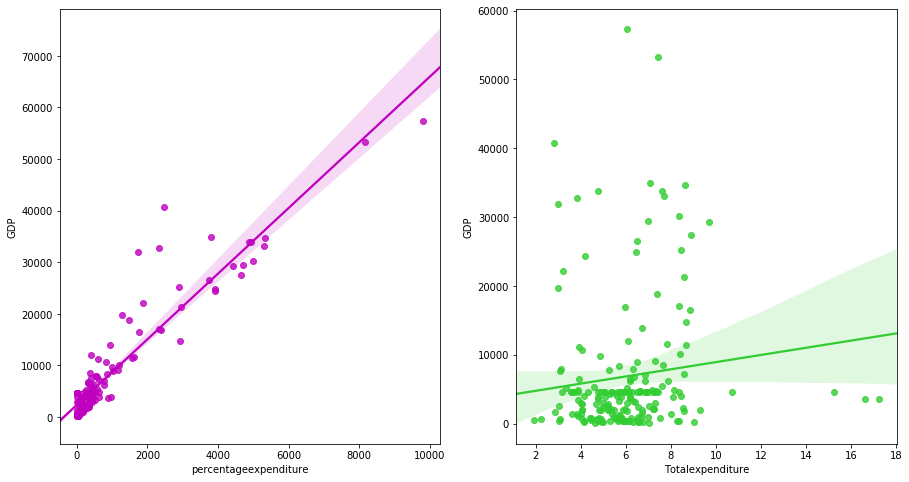

In [80]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.regplot(country_df['percentageexpenditure'],country_df.GDP,color='m')
plt.subplot(1,2,2)
sns.regplot(country_df['Totalexpenditure'],country_df.GDP,color='limegreen')
plt.show()

In [81]:
country_df[country_df.GDP>31050].shape

(10, 21)

In [82]:
country_df[country_df.GDP<310].shape

(10, 21)

In [83]:
l9=country_df[country_df.GDP>31050].Country
v9=country_df[country_df.GDP>31050].GDP
l10=country_df[country_df.GDP<310].Country
v10=country_df[country_df.GDP<310].GDP

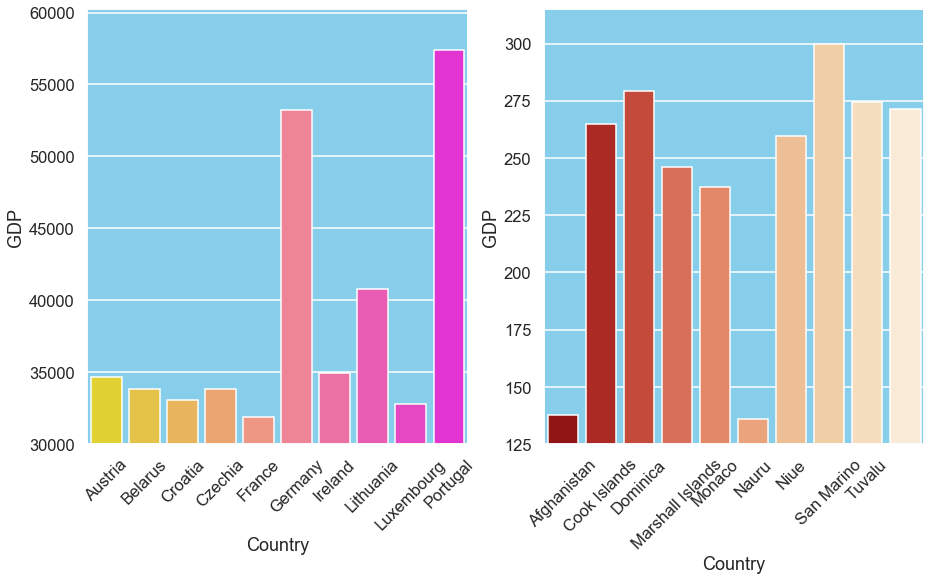

In [84]:
with sns.plotting_context('talk'):
    with sns.axes_style('darkgrid',{'axes.facecolor': 'skyblue'}):
        plt.figure(figsize=(15,8))
        plt.subplot(1,2,1)
        g=sns.barplot(l9,v9,palette='spring_r')
        g.set_xticklabels(rotation=45,labels=l4)
        plt.ylim(30000,)
        plt.subplot(1,2,2)
        h=sns.barplot(l10,v10,palette="OrRd_r")
        h.set_xticklabels(rotation=45,labels=l5)
        plt.ylim (125,)
        plt.show()

In [85]:
df.columns

Index(['Year', 'Status', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths',
       'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling',
       'Year_bin', 'Year_bin_two', 'Status_bin', 'Status_bin_two',
       'Lifeexpectancy_bin', 'Lifeexpectancy_bin_two', 'AdultMortality_bin',
       'AdultMortality_bin_two', 'infantdeaths_bin', 'infantdeaths_bin_two',
       'Alcohol_bin', 'Alcohol_bin_two', 'percentageexpenditure_bin',
       'percentageexpenditure_bin_two', 'HepatitisB_bin', 'HepatitisB_bin_two',
       'Measles_bin', 'Measles_bin_two', 'BMI_bin', 'BMI_bin_two',
       'under-fivedeaths_bin', 'under-fivedeaths_bin_two', 'Polio_bin',
       'Polio_bin_two', 'Totalexpenditure_bin', 'Totalexpenditure_bin_two',
       'Diphtheria_bin', 'Diphtheria_bin_two', 'HIV/AIDS_bi

In [86]:
diseases=['Polio','HepatitisB','Diphtheria','Measles','HIV/AIDS']

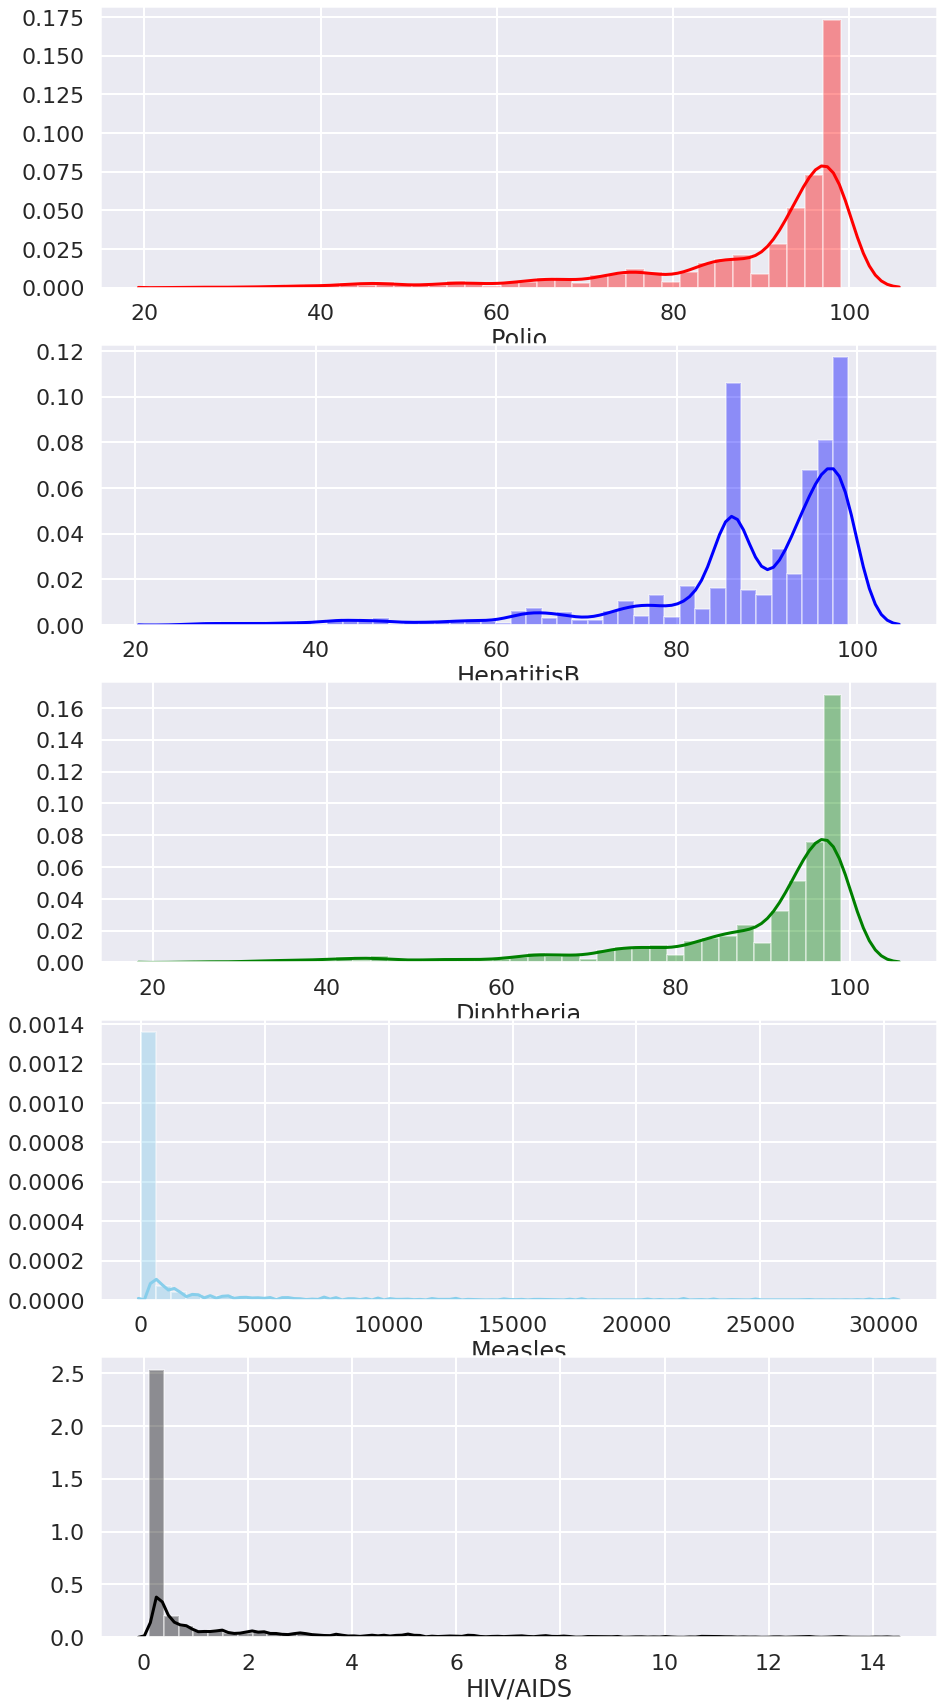

In [135]:
with sns.axes_style('darkgrid'):
    with sns.plotting_context('poster'):
        i = 1
        j=0
        colors=['red','blue','green','skyblue','black']
        plt.figure(figsize=(15,30))
        for d in diseases:
            plt.subplot(5,1,i)
            sns.distplot(df[d],color=colors[j])
            i+=1
            j+=1

<Figure size 2160x2160 with 0 Axes>

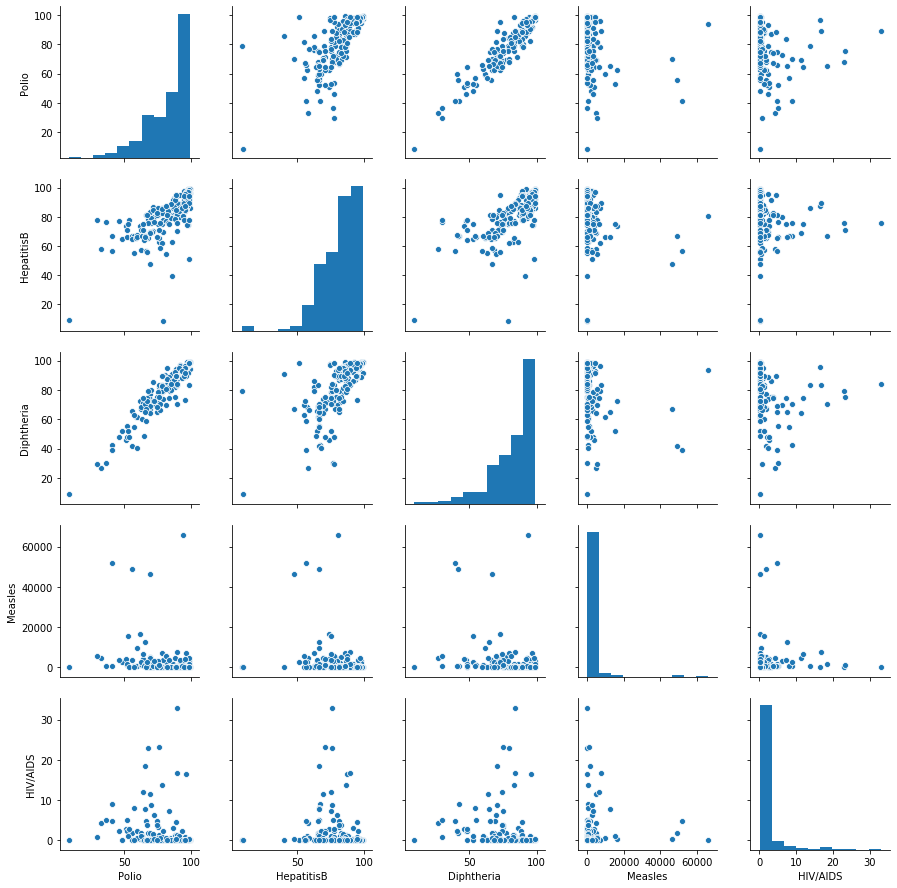

In [88]:
plt.figure(figsize=(30,30))
sns.pairplot(country_df[diseases])
plt.show()

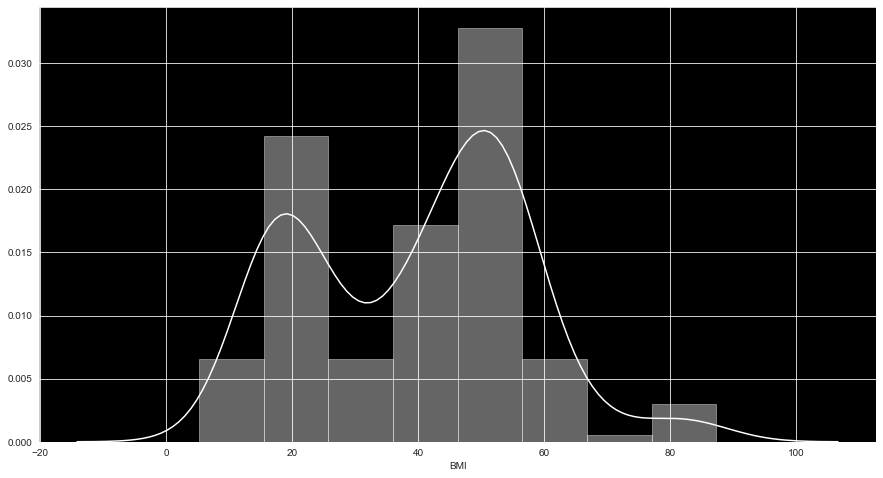

In [89]:
with sns.axes_style('darkgrid',{'axes.facecolor':'black'}):
    plt.figure(figsize=(15,8))
    sns.distplot(country_df['BMI'],color='white')
    plt.show()

In [90]:
country_df[country_df.BMI<15.17].shape

(10, 21)

In [91]:
country_df[country_df.BMI>64.17].shape

(10, 21)

In [92]:
l11=country_df[country_df.BMI<15.17].Country
v11=country_df[country_df.BMI<15.17].BMI
l12=country_df[country_df.BMI>64.17].Country
v12=country_df[country_df.BMI>64.17].BMI

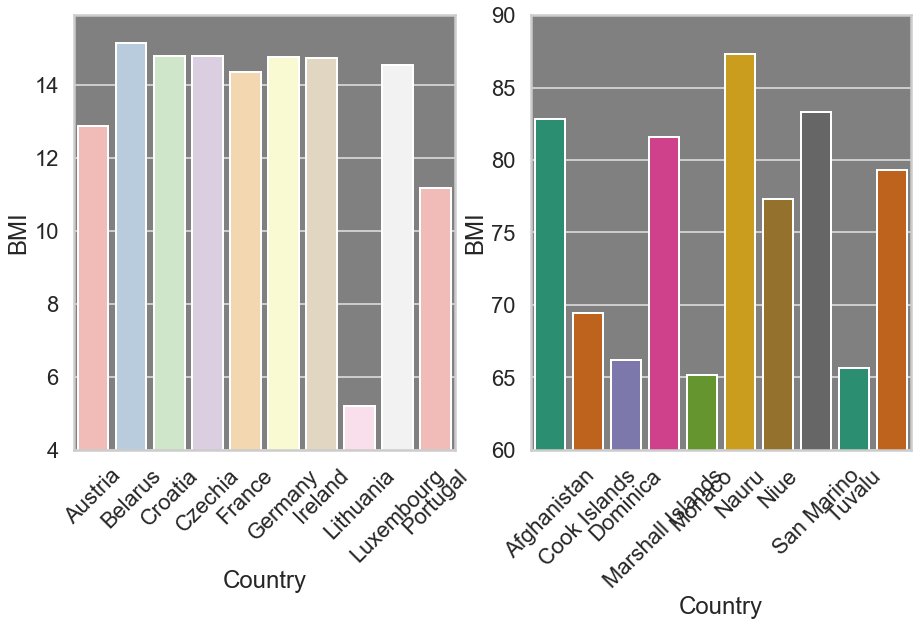

In [93]:
with sns.plotting_context('poster'):
    with sns.axes_style('whitegrid',{'axes.facecolor': 'grey'}):
        plt.figure(figsize=(15,8))
        plt.subplot(1,2,1)
        g=sns.barplot(l11,v11,palette='Pastel1')
        g.set_xticklabels(rotation=45,labels=l4)
        plt.ylim(4,)
        plt.subplot(1,2,2)
        h=sns.barplot(l12,v12,palette="Dark2")
        h.set_xticklabels(rotation=45,labels=l5)
        plt.ylim(60,90)
        plt.show()

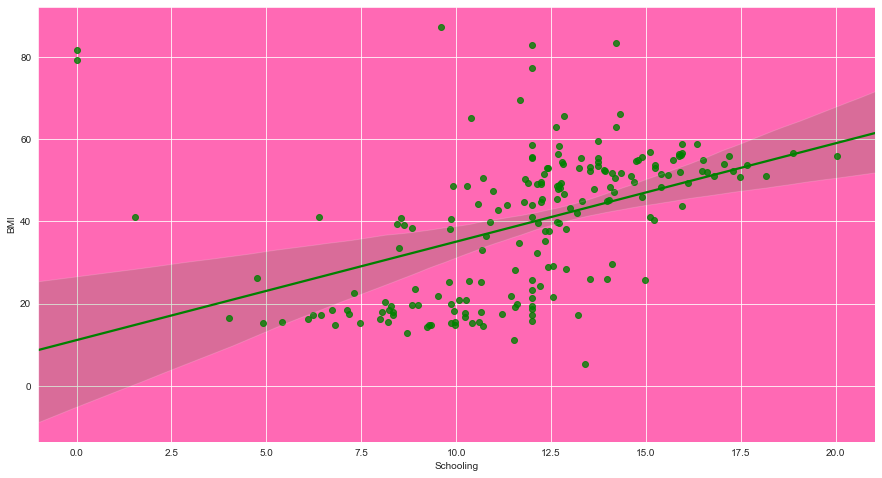

In [94]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'hotpink'}):
    plt.figure(figsize=(15,8))
    sns.regplot(country_df['Schooling'],country_df['BMI'],color='green')
    plt.show()

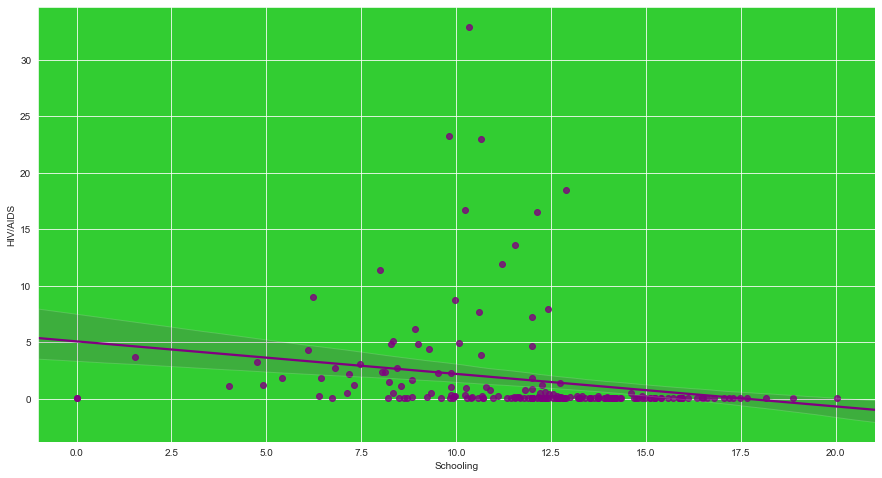

In [95]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'limegreen'}):
    plt.figure(figsize=(15,8))
    sns.regplot(country_df['Schooling'],country_df['HIV/AIDS'],color='purple')
    plt.show()

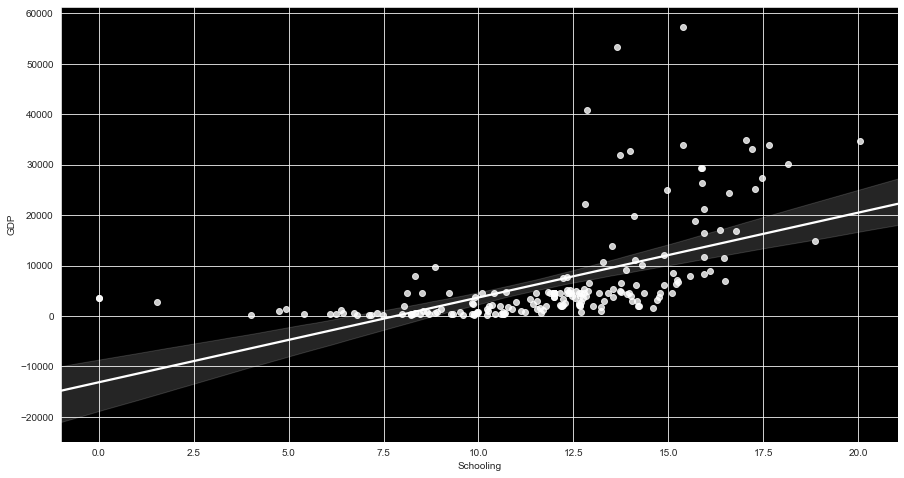

In [96]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'black'}):
    plt.figure(figsize=(15,8))
    sns.regplot(country_df['Schooling'],country_df['GDP'],color='white')
    plt.show()

In [97]:
country_df[country_df.Schooling>16.5].shape

(11, 21)

In [98]:
country_df[country_df.Schooling<6.5].shape

(11, 21)

In [99]:
l13=country_df[country_df.Schooling<6.5].Country
v13=country_df[country_df.Schooling<6.5].Schooling
l14=country_df[country_df.Schooling>16.5].Country
v14=country_df[country_df.Schooling>16.5].Schooling

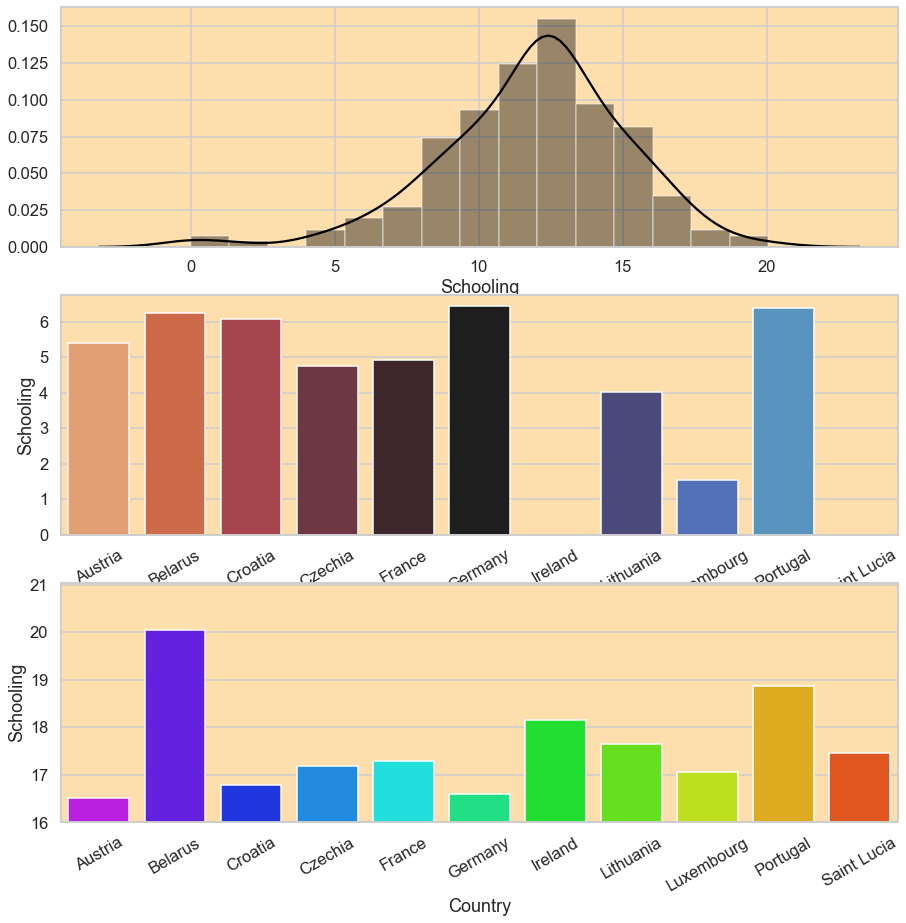

In [100]:
with sns.plotting_context('talk'):
    with sns.axes_style('whitegrid',{'axes.facecolor': 'navajowhite'}):
        plt.figure(figsize=(15,15))
        plt.subplot(3,1,1)
        sns.distplot(country_df['Schooling'],color='black')
        plt.subplot(3,1,2)
        aa=sns.barplot(l13,v13,palette="icefire_r")
        aa.set_xticklabels(rotation=30,labels=l4)
        plt.subplot(3,1,3)
        bb=sns.barplot(l14,v14,palette='gist_rainbow_r')
        bb.set_xticklabels(rotation=30,labels=l4)
        plt.ylim(16,)
        plt.show()

## End part 2

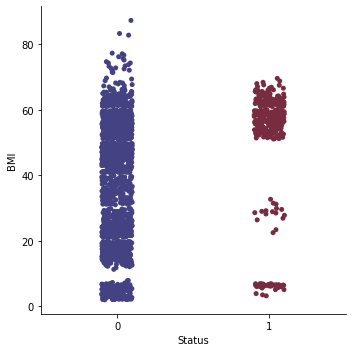

In [101]:
sns.catplot('Status','BMI',data=df,palette='icefire')

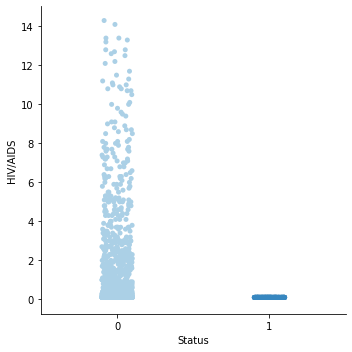

In [102]:
sns.catplot('Status','HIV/AIDS',data=df,palette='Blues')

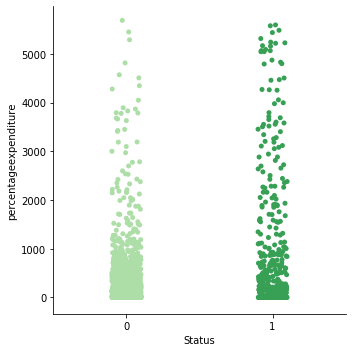

In [103]:
sns.catplot('Status','percentageexpenditure',data=df,palette='Greens')

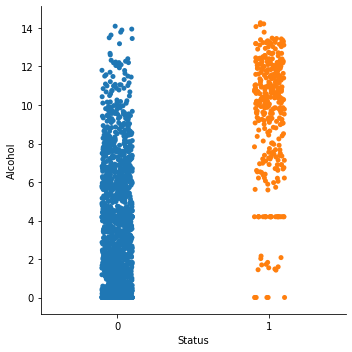

In [104]:
sns.catplot('Status','Alcohol',data=df)

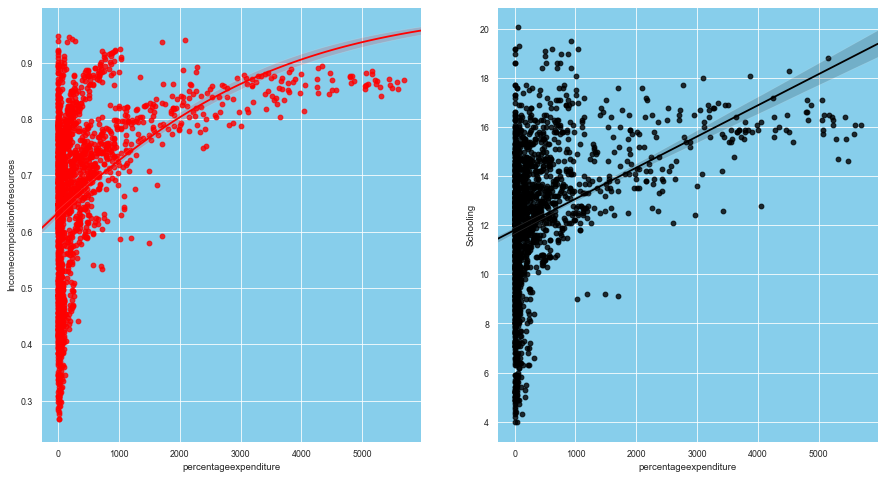

In [105]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'skyblue'}):
    with sns.plotting_context('paper'):
        plt.figure(figsize=(15,8))
        plt.subplot(1,2,1)
        sns.regplot(df['percentageexpenditure'],df['Incomecompositionofresources'],logistic=True,color='r')
        plt.subplot(1,2,2)
        sns.regplot(df['percentageexpenditure'],df['Schooling'],color='k')
        plt.show()

In [106]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

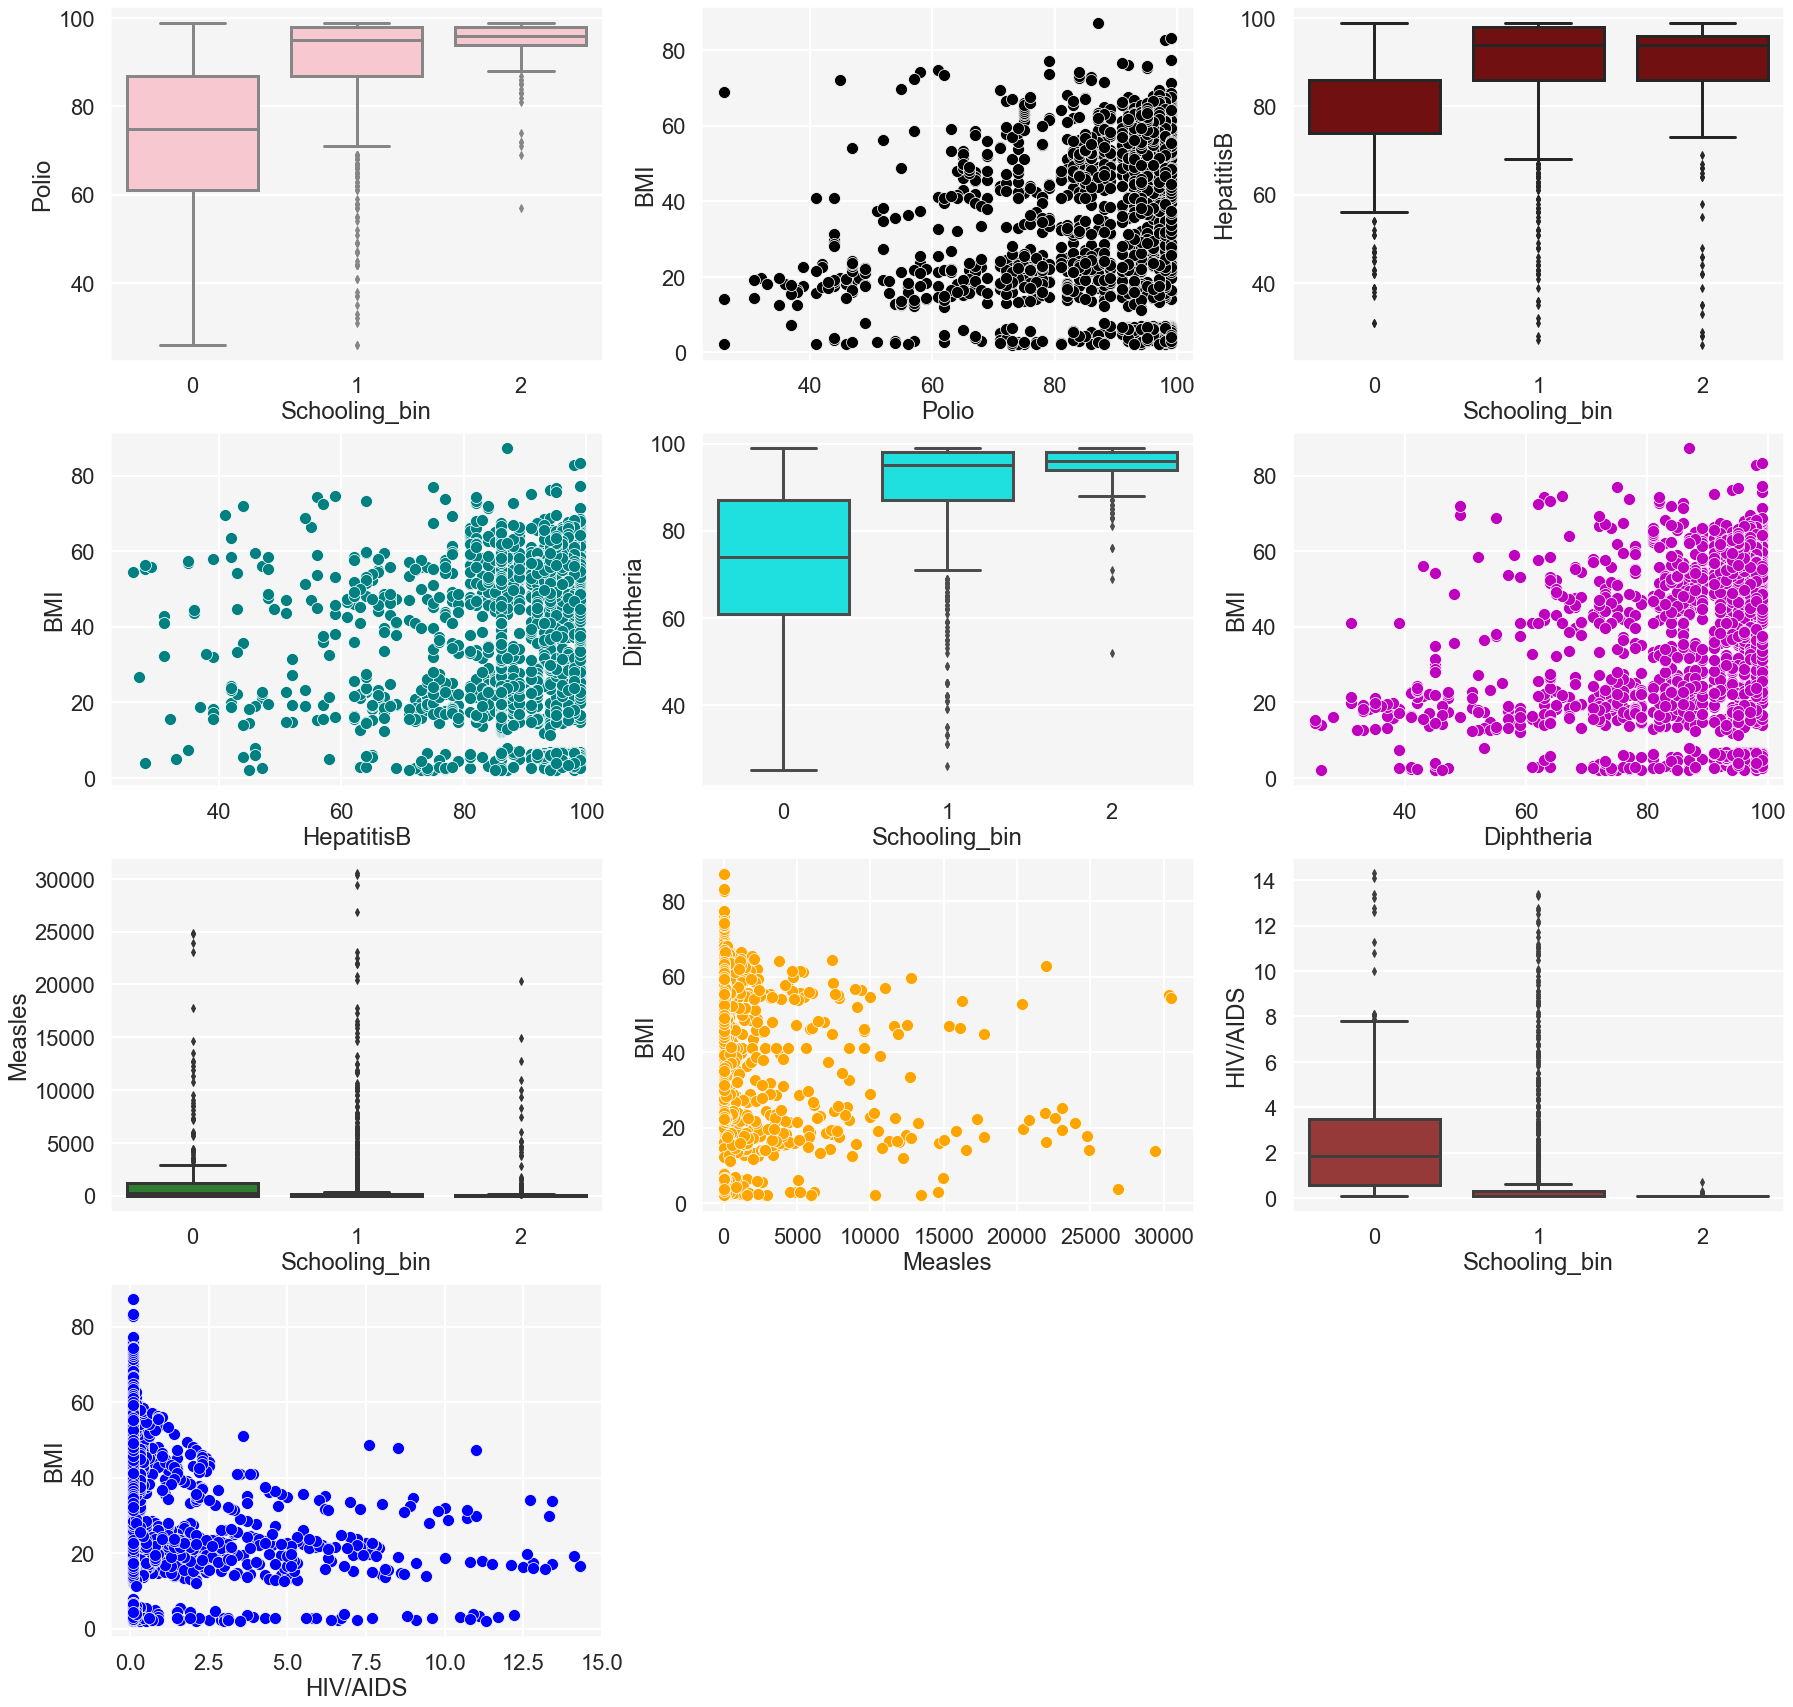

In [107]:
with sns.plotting_context('poster'):
    with sns.axes_style('darkgrid',{'axes.facecolor': 'whitesmoke'}):
        plt.figure(figsize=(30,30))
        i=1
        j=0
        colors=['pink','black','maroon','teal','aqua','m','forestgreen','orange','brown','blue']
        for d in diseases:
            plt.subplot(4,3,i)
            sns.boxplot(df['Schooling_bin'],df[d],color=colors[j])
            plt.subplot(4,3,i+1)
            sns.scatterplot(df[d],df['BMI'],color=colors[j+1])
            i+=2
            j+=2
        plt.show()

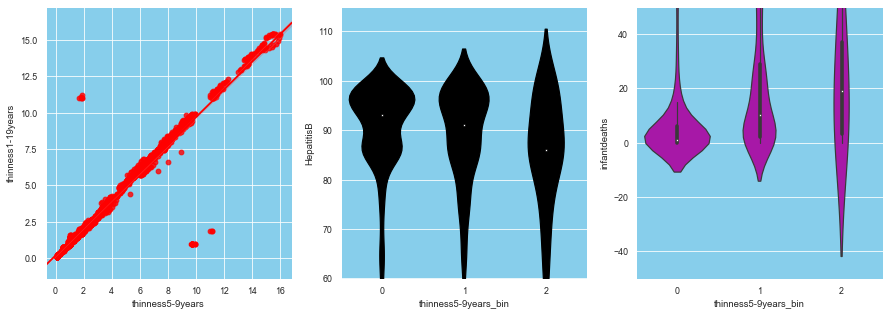

In [108]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'skyblue'}):
    with sns.plotting_context('paper'):
        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)
        sns.regplot(df['thinness5-9years'],df['thinness1-19years'],color='r')
        plt.subplot(1,3,2)
        sns.violinplot(df['thinness5-9years_bin'],df['HepatitisB'],color='k')
        plt.ylim(60,)
        plt.subplot(1,3,3)
        sns.violinplot(df['thinness5-9years_bin'],df['infantdeaths'],color='m')
        plt.ylim(-50,50)
        plt.show()

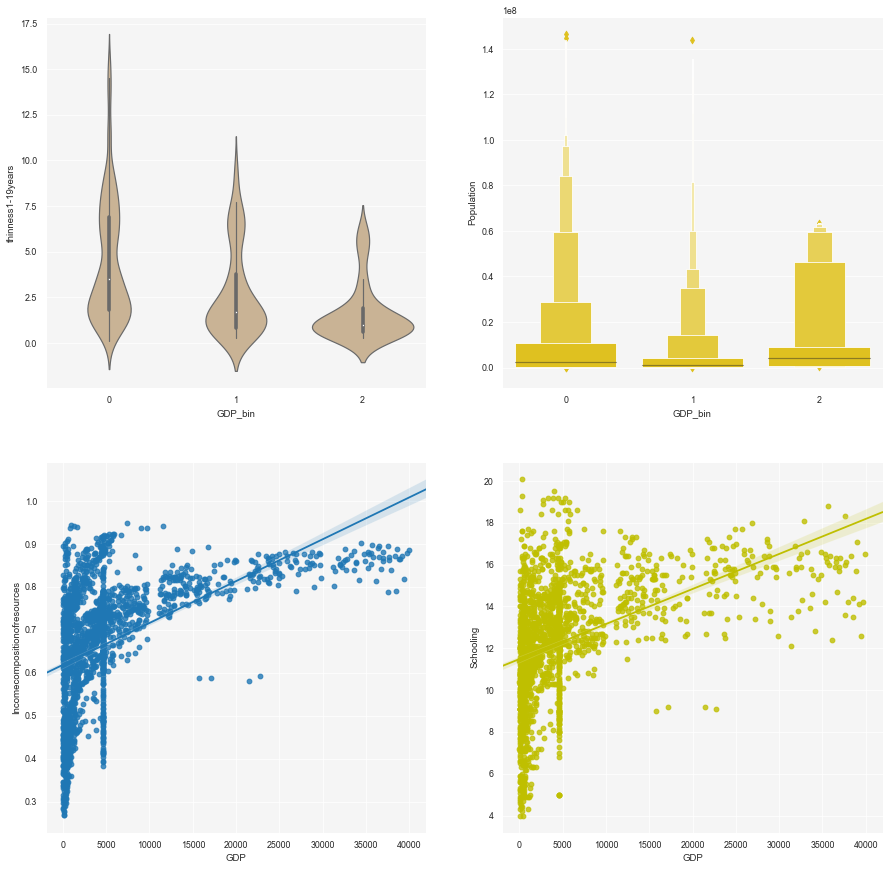

In [109]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'whitesmoke'}):
    with sns.plotting_context('paper'):
        plt.figure(figsize=(15,15))
        plt.subplot(2,2,1)
        sns.violinplot(df['GDP_bin'],df['thinness1-19years'],color='tan')
        plt.subplot(2,2,2)
        sns.boxenplot(df['GDP_bin'],df['Population'],color='gold')
        plt.subplot(2,2,3)
        sns.regplot(df['GDP'],df['Incomecompositionofresources'])
        plt.subplot(2,2,4)
        sns.regplot(df['GDP'],df['Schooling'],color='y')
        plt.show()

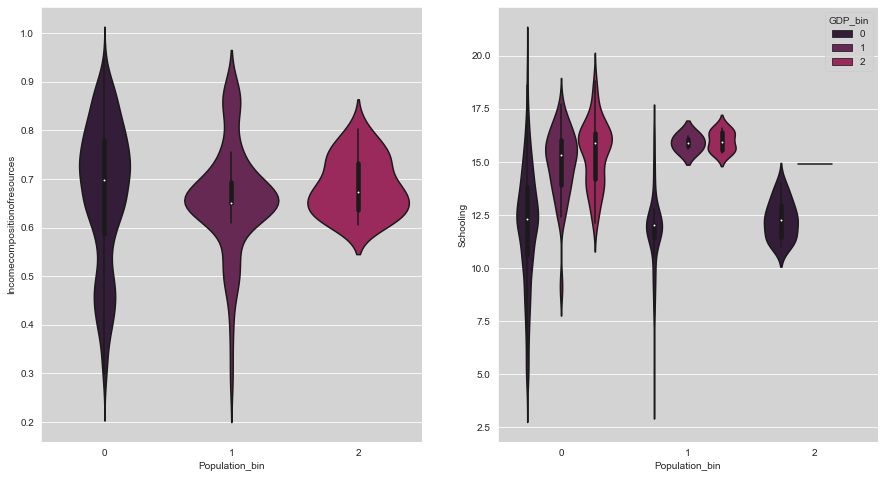

In [110]:
with sns.axes_style('darkgrid',{'axes.facecolor':'lightgrey'}):
    with sns.color_palette('rocket'):
        plt.figure(figsize=(15,8))
        plt.subplot(1,2,1)
        sns.violinplot(df['Population_bin'],df['Incomecompositionofresources'])
        plt.subplot(1,2,2)
        sns.violinplot(df['Population_bin'],df['Schooling'],hue=df['GDP_bin'])
        plt.show()

## End EDA, Begin hypothesis testing

In [111]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / (np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof))

In [112]:
def t_test_and_power(dataframe,sorting_var,value_var,alpha,amount,ratio):
    quick_df = dataframe[[sorting_var,value_var]].groupby(sorting_var)        
    rv_one = stats.norm.rvs(loc=quick_df.mean().iloc[0],scale=quick_df.std().iloc[0],size=amount)
    rv_two = stats.norm.rvs(loc=quick_df.mean().iloc[1],scale=quick_df.std().iloc[1],size=amount)
    ttest = stats.ttest_ind(rv_one,rv_two)
    power = statsmodels.stats.power.tt_ind_solve_power(abs(cohen_d(rv_one,rv_two)),amount,alpha,None,ratio,'two-sided')
    print(power)
    print(ttest)

In [113]:
for var in ['Population','Alcohol','Schooling','percentageexpenditure','HIV/AIDS','Measles','HepatitisB','Diphtheria','Polio']:
    print(var)
    t_test_and_power(df,'Status',var,0.05,300,4)

Population
0.7036172616978507
Ttest_indResult(statistic=1.9735659200065818, pvalue=0.04889105865752331)
Alcohol
1.0
Ttest_indResult(statistic=-20.703522573541772, pvalue=3.328211729833951e-72)
Schooling
1.0
Ttest_indResult(statistic=-18.618818574769275, pvalue=2.2702297112820138e-61)
percentageexpenditure
1.0
Ttest_indResult(statistic=-9.522360927978728, pvalue=4.13358294290735e-20)
HIV/AIDS
1.0
Ttest_indResult(statistic=8.767219922605666, pvalue=1.8952124980710928e-17)
Measles
0.9750824683855268
Ttest_indResult(statistic=3.1020820618745573, pvalue=0.0020122356723229137)
HepatitisB
0.8858976196576992
Ttest_indResult(statistic=-2.5037258424613698, pvalue=0.012554647424055031)
Diphtheria
1.0
Ttest_indResult(statistic=-8.258493886966482, pvalue=9.49553442752074e-16)
Polio
1.0
Ttest_indResult(statistic=-10.789765879986756, pvalue=6.388957676619067e-25)


In [114]:
for d in diseases:
    print(d)
    t_test_and_power(df,'Alcohol',var,0.05,300,4)

Polio
1.0
Ttest_indResult(statistic=-4.879889386020458, pvalue=1.3631684603919821e-06)
HepatitisB
0.9974991160514148
Ttest_indResult(statistic=-3.7709729517977872, pvalue=0.00017876591341991056)
Diphtheria
0.9995795917583149
Ttest_indResult(statistic=-4.191899936211961, pvalue=3.184553033729458e-05)
Measles
0.9999408310094104
Ttest_indResult(statistic=-4.59584471068292, pvalue=5.260476364219241e-06)
HIV/AIDS
0.9996641993000747
Ttest_indResult(statistic=-4.240881106708113, pvalue=2.579275252316369e-05)


In [115]:
for var in ['BMI','GDP',"Schooling"]:
    print(var)
    t_test_and_power(df,'Alcohol_bin_two',var,0.05,300,3)

BMI
1.0
Ttest_indResult(statistic=-7.4864726583540575, pvalue=2.5471186464270793e-13)
GDP
1.0
Ttest_indResult(statistic=-9.298445072009718, pvalue=2.6434861862258056e-19)
Schooling
1.0
Ttest_indResult(statistic=-14.14507510708683, pvalue=2.152530400699024e-39)


In [122]:
for var in ['BMI','Incomecompositionofresources',"Schooling",'thinness1-19years','thinness5-9years']:
    print(var)
    t_test_and_power(df,'percentageexpenditure_bin_two',var,0.05,300,4)

BMI
1.0
Ttest_indResult(statistic=-11.560580167452422, pvalue=4.862646576148219e-28)
Incomecompositionofresources
1.0
Ttest_indResult(statistic=-21.72468054977258, pvalue=1.3892277176755486e-77)
Schooling
1.0
Ttest_indResult(statistic=-20.13522274155388, pvalue=3.151468595700103e-69)
thinness1-19years
1.0
Ttest_indResult(statistic=18.611368103416357, pvalue=2.4792125385135832e-61)
thinness5-9years
1.0
Ttest_indResult(statistic=17.914663372930185, pvalue=8.953256076750232e-58)


In [123]:
t_test_and_power(df,'percentageexpenditure_bin_two','Totalexpenditure',0.05,300,3)

1.0
Ttest_indResult(statistic=-7.626763109768722, pvalue=9.520903196313445e-14)


In [124]:
for var in ['BMI','Incomecompositionofresources',"Schooling",'thinness1-19years','thinness5-9years']:
    print(var)
    t_test_and_power(df,'percentageexpenditure_bin_two',var,0.05,300,4)

BMI
1.0
Ttest_indResult(statistic=-9.421940548439403, pvalue=9.537572487452505e-20)
Incomecompositionofresources
1.0
Ttest_indResult(statistic=-21.539213835010155, pvalue=1.325369265142402e-76)
Schooling
1.0
Ttest_indResult(statistic=-21.970930516509778, pvalue=6.929790190103673e-79)
thinness1-19years
1.0
Ttest_indResult(statistic=16.445244297169648, pvalue=2.063930398240247e-50)
thinness5-9years
1.0
Ttest_indResult(statistic=17.012046489057827, pvalue=3.160482481150602e-53)


In [125]:
for var in ['Schooling','thinness1-19years',"thinness5-9years"]:
    print(var)
    t_test_and_power(df,'Population_bin_two',var,0.05,300,3)

Schooling
0.9685047038693705
Ttest_indResult(statistic=3.1208850069979177, pvalue=0.0018900239183148027)
thinness1-19years
1.0
Ttest_indResult(statistic=-7.581935143288972, pvalue=1.3059391870335827e-13)
thinness5-9years
1.0
Ttest_indResult(statistic=-6.693774401090554, pvalue=5.014574876349086e-11)
